Import Libraries and Dataset

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.metrics import roc_curve
from matplotlib.pyplot import figure
from collections import Counter
from imblearn.over_sampling import SMOTE 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [3]:
data = pd.read_csv("dataset.csv")
data

encounter_id  patient_id  hospital_id   age        bmi  \
0             66154       25312          118  68.0  22.730000   
1            114252       59342           81  77.0  27.420000   
2            119783       50777          118  25.0  31.950000   
3             79267       46918          118  81.0  22.640000   
4             92056       34377           33  19.0        NaN   
...             ...         ...          ...   ...        ...   
91708         91592       78108           30  75.0  23.060250   
91709         66119       13486          121  56.0  47.179671   
91710          8981       58179          195  48.0  27.236914   
91711         33776      120598           66   NaN  23.297481   
91712          1671       53612          104  82.0  22.031250   

       elective_surgery  ethnicity gender  height           icu_admit_source  \
0                     0  Caucasian      M   180.3                      Floor   
1                     0  Caucasian      F   160.0                      Floor   
2                     0  Caucasian      F   172.7       Accident & Emergency   
3                     1  Caucasian      F   165.1  Operating Room / Recovery   
4                     0  Caucasian      M   188.0       Accident & Emergency   
...                 ...        ...    ...     ...                        ...   
91708                 0  Caucasian      M   177.8                      Floor   
91709                 0  Caucasian      F   183.0                      Floor   
91710                 0  Caucasian      M   170.2       Accident & Emergency   
91711                 0  Caucasian      F   154.9       Accident & Emergency   
91712                 1  Caucasian      F   160.0  Operating Room / Recovery   

       ...  diabetes_mellitus hepatic_failure immunosuppression  leukemia  \
0      ...                1.0             0.0               0.0       0.0   
1      ...                1.0             0.0               0.0       0.0   
2      ...                0.0             0.0               0.0       0.0   
3      ...                0.0             0.0               0.0       0.0   
4      ...                0.0             0.0               0.0       0.0   
...    ...                ...             ...               ...       ...   
91708  ...                1.0             0.0               0.0       0.0   
91709  ...                0.0             0.0               0.0       0.0   
91710  ...                1.0             0.0               0.0       0.0   
91711  ...                0.0             0.0               0.0       0.0   
91712  ...                0.0             0.0               0.0       0.0   

       lymphoma  solid_tumor_with_metastasis  apache_3j_bodysystem  \
0           0.0                          0.0                Sepsis   
1           0.0                          0.0           Respiratory   
2           0.0                          0.0             Metabolic   
3           0.0                          0.0        Cardiovascular   
4           0.0                          0.0                Trauma   
...         ...                          ...                   ...   
91708       0.0                          1.0                Sepsis   
91709       0.0                          0.0                Sepsis   
91710       0.0                          0.0             Metabolic   
91711       0.0                          0.0           Respiratory   
91712       0.0                          0.0      Gastrointestinal   

       apache_2_bodysystem  Unnamed: 83  hospital_death  
0           Cardiovascular          NaN               0  
1              Respiratory          NaN               0  
2                Metabolic          NaN               0  
3           Cardiovascular          NaN               0  
4                   Trauma          NaN               0  
...                    ...          ...             ...  
91708       Cardiovascular          NaN               0  
91709       Cardiovascular         

In [4]:
data.shape


(91713, 85)

Missing values

In [5]:
dico_isnull = {c : len(data[data[c].isnull()== True]) for c in data.columns}
dico_isnull

{'encounter_id': 0,
 'patient_id': 0,
 'hospital_id': 0,
 'age': 4228,
 'bmi': 3429,
 'elective_surgery': 0,
 'ethnicity': 1395,
 'gender': 25,
 'height': 1334,
 'icu_admit_source': 112,
 'icu_id': 0,
 'icu_stay_type': 0,
 'icu_type': 0,
 'pre_icu_los_days': 0,
 'weight': 2720,
 'apache_2_diagnosis': 1662,
 'apache_3j_diagnosis': 1101,
 'apache_post_operative': 0,
 'arf_apache': 715,
 'gcs_eyes_apache': 1901,
 'gcs_motor_apache': 1901,
 'gcs_unable_apache': 1037,
 'gcs_verbal_apache': 1901,
 'heart_rate_apache': 878,
 'intubated_apache': 715,
 'map_apache': 994,
 'resprate_apache': 1234,
 'temp_apache': 4108,
 'ventilated_apache': 715,
 'd1_diasbp_max': 165,
 'd1_diasbp_min': 165,
 'd1_diasbp_noninvasive_max': 1040,
 'd1_diasbp_noninvasive_min': 1040,
 'd1_heartrate_max': 145,
 'd1_heartrate_min': 145,
 'd1_mbp_max': 220,
 'd1_mbp_min': 220,
 'd1_mbp_noninvasive_max': 1479,
 'd1_mbp_noninvasive_min': 1479,
 'd1_resprate_max': 385,
 'd1_resprate_min': 385,
 'd1_spo2_max': 333,
 'd1_spo2

In [6]:
dico_isnull_p = {c : (len(data[data[c].isnull()== True])/(data.shape[0])*100) for c in data.columns}
dico_isnull_p

{'encounter_id': 0.0,
 'patient_id': 0.0,
 'hospital_id': 0.0,
 'age': 4.610033473989511,
 'bmi': 3.738837460338229,
 'elective_surgery': 0.0,
 'ethnicity': 1.5210493605050537,
 'gender': 0.027258949112993792,
 'height': 1.454537524669349,
 'icu_admit_source': 0.12212009202621221,
 'icu_id': 0.0,
 'icu_stay_type': 0.0,
 'icu_type': 0.0,
 'pre_icu_los_days': 0.0,
 'weight': 2.965773663493725,
 'apache_2_diagnosis': 1.8121749370318276,
 'apache_3j_diagnosis': 1.2004841189362467,
 'apache_post_operative': 0.0,
 'arf_apache': 0.7796059446316226,
 'gcs_eyes_apache': 2.072770490552048,
 'gcs_motor_apache': 2.072770490552048,
 'gcs_unable_apache': 1.1307012092069826,
 'gcs_verbal_apache': 2.072770490552048,
 'heart_rate_apache': 0.957334292848342,
 'intubated_apache': 0.7796059446316226,
 'map_apache': 1.0838158167326335,
 'resprate_apache': 1.3455017282173738,
 'temp_apache': 4.47919051824714,
 'ventilated_apache': 0.7796059446316226,
 'd1_diasbp_max': 0.17990906414575905,
 'd1_diasbp_min': 

In [7]:
data.drop('Unnamed: 83', axis = 1, inplace=True)
data.shape

(91713, 84)

Features Selection

In [8]:
df = data.copy()
df=df.dropna()

In [9]:
df.shape

(56935, 84)

In [10]:
df_int= df.select_dtypes(include='int64') 
df_int.drop("patient_id", axis = 1, inplace=True)
df_int.drop("encounter_id", axis = 1, inplace=True)
df_int.drop("hospital_death", axis = 1, inplace=True)
df_int

hospital_id  elective_surgery  icu_id  apache_post_operative
0              118                 0      92                      0
1               81                 0      90                      0
5               83                 0      95                      0
10              77                 1     113                      1
17             118                 0      92                      0
...            ...               ...     ...                    ...
91698          195                 1     908                      1
91706          121                 0     925                      0
91708           30                 0     927                      0
91709          121                 0     925                      0
91712          104                 1     926                      1

[56935 rows x 4 columns]

In [11]:
df_string= df.select_dtypes(include='object')
df_string

ethnicity gender           icu_admit_source icu_stay_type  \
0            Caucasian      M                      Floor         admit   
1            Caucasian      F                      Floor         admit   
5            Caucasian      M       Accident & Emergency         admit   
10            Hispanic      F  Operating Room / Recovery         admit   
17            Hispanic      M       Accident & Emergency         admit   
...                ...    ...                        ...           ...   
91698        Caucasian      M  Operating Room / Recovery         admit   
91706  Native American      M       Accident & Emergency         admit   
91708        Caucasian      M                      Floor         admit   
91709        Caucasian      F                      Floor         admit   
91712        Caucasian      F  Operating Room / Recovery         admit   

           icu_type apache_3j_bodysystem apache_2_bodysystem  
0             CTICU               Sepsis      Cardiovascular  
1      Med-Surg ICU          Respiratory         Respiratory  
5      Med-Surg ICU         Neurological          Neurologic  
10     Med-Surg ICU          Respiratory         Respiratory  
17            CTICU          Respiratory         Respiratory  
...             ...                  ...                 ...  
91698  Med-Surg ICU     Gastrointestinal    Gastrointestinal  
91706  Med-Surg ICU       Cardiovascular      Cardiovascular  
91708   Cardiac ICU               Sepsis      Cardiovascular  
91709  Med-Surg ICU               Sepsis      Cardiovascular  
91712  Med-Surg ICU     Gastrointestinal    Gastrointestinal  

[56935 rows x 7 columns]

In [12]:
df_numerique= df.select_dtypes(include='float64')
df_numerique.columns

Index(['age', 'bmi', 'height', 'pre_icu_los_days', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'arf_apache',
       'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache',
       'gcs_verbal_apache', 'heart_rate_apache', 'intubated_apache',
       'map_apache', 'resprate_apache', 'temp_apache', 'ventilated_apache',
       'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max',
       'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min',
       'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max',
       'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min',
       'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min',
       'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max',
       'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min',
       'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min',
       'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min',
       'h1_mbp_noninvasive_max', 'h1_mbp

In [13]:
list_categories = ['apache_3j_diagnosis','gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache',
       'gcs_verbal_apache', 'intubated_apache', 'ventilated_apache','aids', 'cirrhosis', 'diabetes_mellitus',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis']

df_numerique.drop(list_categories , axis=1,inplace=True)

In [14]:
df_categorial = pd.concat([df_int,df_string,data[list_categories]], axis=1)
df_categorial

hospital_id  elective_surgery  icu_id  apache_post_operative  \
0            118.0               0.0    92.0                    0.0   
1             81.0               0.0    90.0                    0.0   
5             83.0               0.0    95.0                    0.0   
10            77.0               1.0   113.0                    1.0   
17           118.0               0.0    92.0                    0.0   
...            ...               ...     ...                    ...   
91704          NaN               NaN     NaN                    NaN   
91705          NaN               NaN     NaN                    NaN   
91707          NaN               NaN     NaN                    NaN   
91710          NaN               NaN     NaN                    NaN   
91711          NaN               NaN     NaN                    NaN   

       ethnicity gender           icu_admit_source icu_stay_type  \
0      Caucasian      M                      Floor         admit   
1      Caucasian      F                      Floor         admit   
5      Caucasian      M       Accident & Emergency         admit   
10      Hispanic      F  Operating Room / Recovery         admit   
17      Hispanic      M       Accident & Emergency         admit   
...          ...    ...                        ...           ...   
91704        NaN    NaN                        NaN           NaN   
91705        NaN    NaN                        NaN           NaN   
91707        NaN    NaN                        NaN           NaN   
91710        NaN    NaN                        NaN           NaN   
91711        NaN    NaN                        NaN           NaN   

           icu_type apache_3j_bodysystem  ... intubated_apache  \
0             CTICU               Sepsis  ...              0.0   
1      Med-Surg ICU          Respiratory  ...              0.0   
5      Med-Surg ICU         Neurological  ...              0.0   
10     Med-Surg ICU          Respiratory  ...              0.0   
17            CTICU          Respiratory  ...              1.0   
...             ...                  ...  ...              ...   
91704           NaN                  NaN  ...              0.0   
91705           NaN                  NaN  ...              0.0   
91707           NaN                  NaN  ...              NaN   
91710           NaN                  NaN  ...              0.0   
91711           NaN                  NaN  ...              0.0   

       ventilated_apache  aids  cirrhosis  diabetes_mellitus  hepatic_failure  \
0                    0.0   0.0        0.0                1.0              0.0   
1                    1.0   0.0        0.0                1.0              0.0   
5                    0.0   0.0        0.0                1.0              0.0   
10                   0.0   0.0        0.0                0.0              0.0   
17                   1.0   0.0        0.0                0.0              0.0   
...                  ...   ...        ...                ...              ...   
91704                0.0   0.0        0.0                0.0              0.0   
91705                0.0   0.0        0.0                1.0              0.0   
91707                NaN   NaN        NaN                NaN              NaN   
91710                0.0   0.0        0.0                1.0              0.0   
91711                0.0   0.0        0.0                0.0              0.0   

       immunosuppression  leukemia  lymphoma  solid_tumor_with_metastasis  
0                    0.0       0.0       0.0                          0.0  
1                    0.0       0.0       0.0                          0.0  
5                    0.0       0.0       0.0                          0.0  
10                   1.0       0.0       0.0                          0.0  
17                   0.0       0.0       0.0                          0.0  
...                  ...       ...       ...                          ...  
91704                0.0       0.0     

In [15]:
df_numerique

age        bmi  height  pre_icu_los_days  weight  apache_2_diagnosis  \
0      68.0  22.730000   180.3          0.541667    73.9               113.0   
1      77.0  27.420000   160.0          0.927778    70.2               108.0   
5      67.0  27.560000   190.5          0.000694   100.0               301.0   
10     72.0  28.257052   154.9          0.004861    67.8               303.0   
17     46.0  25.845717   167.6          0.000000    72.6               108.0   
...     ...        ...     ...               ...     ...                 ...   
91698  47.0  51.439842   195.0          0.033333   186.0               304.0   
91706  54.0  19.770448   177.8          0.025694    62.5               109.0   
91708  75.0  23.060250   177.8          0.298611    72.9               113.0   
91709  56.0  47.179671   183.0          0.120139   158.0               113.0   
91712  82.0  22.031250   160.0          0.018056    56.4               304.0   

       arf_apache  heart_rate_apache  map_apache  resprate_apache  ...  \
0             0.0              118.0        40.0             36.0  ...   
1             0.0              120.0        46.0             33.0  ...   
5             0.0              113.0       130.0             35.0  ...   
10            0.0              101.0        72.0             15.0  ...   
17            0.0              114.0       113.0             34.0  ...   
...           ...                ...         ...              ...  ...   
91698         0.0              137.0        66.0              8.0  ...   
91706         0.0               55.0        62.0             12.0  ...   
91708         0.0              115.0        48.0              9.0  ...   
91709         0.0              100.0        62.0             33.0  ...   
91712         0.0              101.0        56.0              4.0  ...   

       h1_sysbp_max  h1_sysbp_min  h1_sysbp_noninvasive_max  \
0             131.0         115.0                     131.0   
1              95.0          71.0                      95.0   
5             143.0         143.0                     143.0   
10            145.0         114.0                     145.0   
17            169.0         115.0                     169.0   
...             ...           ...                       ...   
91698         104.0         104.0                     104.0   
91706         169.0         143.0                     169.0   
91708          94.0          87.0                      94.0   
91709         127.0         107.0                     127.0   
91712          93.0          89.0                      93.0   

       h1_sysbp_noninvasive_min  d1_glucose_max  d1_glucose_min  \
0                         115.0           168.0           109.0   
1                          71.0           145.0           128.0   
5                         143.0           156.0           125.0   
10                        114.0           158.0           133.0   
17                        115.0           143.0           143.0   
...                         ...             ...             ...   
91698                     104.0           128.0           128.0   
91706                     143.0            91.0            91.0   
91708                      87.0           400.0           187.0   
91709                     107.0           177.0           177.0   
91712                      89.0           158.0           158.0   

       d1_potassium_max  d1_potassium_min  apache_4a_hospital_death_prob  \
0                   4.0               3.4                           0.10   
1                   4.2               3.8                           0.47   
5                   3.9               3.7                           0.05   
10                  4.2               4.2                           0.01   
17                  4.9               4.9                           0.11   
...                 ...               ...                            ...   
91698               4.2               4.2                       

Statistical test

In [16]:
X_numerique = df_numerique
y_numerique = df.loc[:,"hospital_death"]

In [17]:
fs = SelectKBest(score_func=f_classif, k="all")
# apply feature selection
X_selected = fs.fit_transform(X_numerique, y_numerique)
print(X_selected.shape)

(56935, 55)


In [18]:
features_names = X_numerique.columns
features_names[fs.get_support()]

Index(['age', 'bmi', 'height', 'pre_icu_los_days', 'weight',
       'apache_2_diagnosis', 'arf_apache', 'heart_rate_apache', 'map_apache',
       'resprate_apache', 'temp_apache', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',
       'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
       'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max',
       'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max',
       'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min',
       'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min',
       'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min',
       'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max',
       'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max',
       'h1_sysbp_min', 'h1_sysbp_noninvasive_max', 'h1_s

In [19]:
# Feature importance 
feature_importance_numerique = pd.DataFrame({
    "feature_names": features_names,
    "coefficients":fs.scores_
})

feature_importance_numerique.sort_values(by = "coefficients", ascending = False)

feature_names  coefficients
53  apache_4a_hospital_death_prob   8544.457003
54       apache_4a_icu_death_prob   7557.397338
30                    d1_temp_min   2499.486119
24                    d1_spo2_min   2483.797497
26                   d1_sysbp_min   2446.865417
28       d1_sysbp_noninvasive_min   2441.020133
18                     d1_mbp_min   2155.065846
20         d1_mbp_noninvasive_min   2145.726652
12                  d1_diasbp_min   1808.547200
14      d1_diasbp_noninvasive_min   1803.547100
15               d1_heartrate_max   1509.053915
10                    temp_apache   1385.447511
46                   h1_sysbp_min   1050.436513
48       h1_sysbp_noninvasive_min   1042.358630
40         h1_mbp_noninvasive_min   1032.556180
38                     h1_mbp_min   1027.470610
34      h1_diasbp_noninvasive_min    844.749853
32                  h1_diasbp_min    839.626757
41                h1_resprate_max    817.186822
7               heart_rate_apache    704.113811
44                    h1_spo2_min    698.160953
21                d1_resprate_max    680.433798
0                             age    669.563914
35               h1_heartrate_max    666.432025
51               d1_potassium_max    639.252963
42                h1_resprate_min    557.608480
9                 resprate_apache    409.431837
5              apache_2_diagnosis    389.791256
49                 d1_glucose_max    378.722655
36               h1_heartrate_min    368.590756
3                pre_icu_los_days    279.411205
45                   h1_sysbp_max    178.977715
47       h1_sysbp_noninvasive_max    177.781597
39         h1_mbp_noninvasive_max    158.155319
37                     h1_mbp_max    153.096909
43                    h1_spo2_max    118.646584
8                      map_apache     53.686443
4                          weight     48.115849
6                      arf_apache     47.858604
33      h1_diasbp_noninvasive_max     44.365367
31                  h1_diasbp_max     42.146531
29                    d1_temp_max     36.538492
1                             bmi     35.440741
22                d1_resprate_min     33.044738
50                 d1_glucose_min     21.514845
52               d1_potassium_min     20.764359
27       d1_sysbp_noninvasive_max     13.921101
25                   d1_sysbp_max     13.734289
23                    d1_spo2_max      9.573945
11                  d1_diasbp_max      8.520316
13      d1_diasbp_noninvasive_max      8.502058
2                          height      6.589784
16               d1_heartrate_min      5.048988
19         d1_mbp_noninvasive_max      1.655344
17                     d1_mbp_max      1.204999

Selection methodology: we removed all the columns with a coefficient lower than 20.

We have also removed one of the variables of the same nature or context that have coefficients that are very close, and we have kept the one that has the highest coefficient.

For example "d1_sysbp_min" coef = 2446 and "d1_sysbp_noninvasive_min" coef = 2441 are two variables that represent the blood pressure, we keep "d1_sysbp_min" coef = 2446.

In [20]:
# delete numerical features with ANOVA
data.drop("bmi", axis = 1, inplace=True)
data.drop("height", axis = 1, inplace=True)



data.drop("d1_diasbp_max", axis = 1, inplace=True)



data.drop("d1_diasbp_noninvasive_max", axis = 1, inplace=True)

data.drop("d1_diasbp_noninvasive_min", axis = 1, inplace=True)

data.drop("d1_sysbp_noninvasive_max", axis = 1, inplace=True)
data.drop("d1_sysbp_noninvasive_min", axis = 1, inplace=True)

data.drop("d1_sysbp_max", axis = 1, inplace=True)


data.drop("d1_spo2_max", axis = 1, inplace=True)


data.drop("h1_diasbp_max", axis = 1, inplace=True)

data.drop("h1_diasbp_min", axis = 1, inplace=True)




data.drop("h1_sysbp_noninvasive_max", axis = 1, inplace=True)
data.drop("h1_sysbp_noninvasive_min", axis = 1, inplace=True)


data.drop("h1_mbp_max", axis = 1, inplace=True)

data.drop("h1_mbp_min", axis = 1, inplace=True)
data.drop("d1_heartrate_min",axis = 1, inplace=True)


data.drop("d1_mbp_max", axis = 1, inplace=True)
data.drop("d1_mbp_noninvasive_min", axis = 1, inplace=True)
data.drop("d1_mbp_noninvasive_max", axis = 1, inplace=True)

In [21]:
# categorical variables deleted because they have several classes that have one or two unrepresentative individuals.data.drop("hospital_id", axis = 1, inplace=True)

data.drop("icu_id", axis = 1, inplace=True)

data.drop("icu_stay_type", axis = 1, inplace=True)

data.drop("apache_3j_diagnosis", axis = 1, inplace=True)

data.drop('encounter_id', axis = 1, inplace=True)

data.drop('patient_id', axis = 1, inplace=True)
data.drop("gcs_unable_apache", axis = 1, inplace=True)

In [22]:
data.columns

Index(['hospital_id', 'age', 'elective_surgery', 'ethnicity', 'gender',
       'icu_admit_source', 'icu_type', 'pre_icu_los_days', 'weight',
       'apache_2_diagnosis', 'apache_post_operative', 'arf_apache',
       'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache',
       'heart_rate_apache', 'intubated_apache', 'map_apache',
       'resprate_apache', 'temp_apache', 'ventilated_apache', 'd1_diasbp_min',
       'd1_heartrate_max', 'd1_mbp_min', 'd1_resprate_max', 'd1_resprate_min',
       'd1_spo2_min', 'd1_sysbp_min', 'd1_temp_max', 'd1_temp_min',
       'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min',
       'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_noninvasive_max',
       'h1_mbp_noninvasive_min', 'h1_resprate_max', 'h1_resprate_min',
       'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max', 'h1_sysbp_min',
       'd1_glucose_max', 'd1_glucose_min', 'd1_potassium_max',
       'd1_potassium_min', 'apache_4a_hospital_death_prob',
       'apache_4a_icu_death_prob', 

In [23]:
data.shape

(91713, 59)

Removal of missing values, outliers and duplicates

In [24]:
dico_isnull_p = {c : np.around((len(data[data[c].isnull()== True]))/(data.shape[0])*100) for c in data.columns}
dico_isnull_p

{'hospital_id': 0.0,
 'age': 5.0,
 'elective_surgery': 0.0,
 'ethnicity': 2.0,
 'gender': 0.0,
 'icu_admit_source': 0.0,
 'icu_type': 0.0,
 'pre_icu_los_days': 0.0,
 'weight': 3.0,
 'apache_2_diagnosis': 2.0,
 'apache_post_operative': 0.0,
 'arf_apache': 1.0,
 'gcs_eyes_apache': 2.0,
 'gcs_motor_apache': 2.0,
 'gcs_verbal_apache': 2.0,
 'heart_rate_apache': 1.0,
 'intubated_apache': 1.0,
 'map_apache': 1.0,
 'resprate_apache': 1.0,
 'temp_apache': 4.0,
 'ventilated_apache': 1.0,
 'd1_diasbp_min': 0.0,
 'd1_heartrate_max': 0.0,
 'd1_mbp_min': 0.0,
 'd1_resprate_max': 0.0,
 'd1_resprate_min': 0.0,
 'd1_spo2_min': 0.0,
 'd1_sysbp_min': 0.0,
 'd1_temp_max': 3.0,
 'd1_temp_min': 3.0,
 'h1_diasbp_noninvasive_max': 8.0,
 'h1_diasbp_noninvasive_min': 8.0,
 'h1_heartrate_max': 3.0,
 'h1_heartrate_min': 3.0,
 'h1_mbp_noninvasive_max': 10.0,
 'h1_mbp_noninvasive_min': 10.0,
 'h1_resprate_max': 5.0,
 'h1_resprate_min': 5.0,
 'h1_spo2_max': 5.0,
 'h1_spo2_min': 5.0,
 'h1_sysbp_max': 4.0,
 'h1_sysbp

In [25]:
data = data.dropna()

In [26]:
dico_isnull_p = {c : np.around((len(data[data[c].isnull()== True]))/(data.shape[0])*100) for c in data.columns}
dico_isnull_p

{'hospital_id': 0.0,
 'age': 0.0,
 'elective_surgery': 0.0,
 'ethnicity': 0.0,
 'gender': 0.0,
 'icu_admit_source': 0.0,
 'icu_type': 0.0,
 'pre_icu_los_days': 0.0,
 'weight': 0.0,
 'apache_2_diagnosis': 0.0,
 'apache_post_operative': 0.0,
 'arf_apache': 0.0,
 'gcs_eyes_apache': 0.0,
 'gcs_motor_apache': 0.0,
 'gcs_verbal_apache': 0.0,
 'heart_rate_apache': 0.0,
 'intubated_apache': 0.0,
 'map_apache': 0.0,
 'resprate_apache': 0.0,
 'temp_apache': 0.0,
 'ventilated_apache': 0.0,
 'd1_diasbp_min': 0.0,
 'd1_heartrate_max': 0.0,
 'd1_mbp_min': 0.0,
 'd1_resprate_max': 0.0,
 'd1_resprate_min': 0.0,
 'd1_spo2_min': 0.0,
 'd1_sysbp_min': 0.0,
 'd1_temp_max': 0.0,
 'd1_temp_min': 0.0,
 'h1_diasbp_noninvasive_max': 0.0,
 'h1_diasbp_noninvasive_min': 0.0,
 'h1_heartrate_max': 0.0,
 'h1_heartrate_min': 0.0,
 'h1_mbp_noninvasive_max': 0.0,
 'h1_mbp_noninvasive_min': 0.0,
 'h1_resprate_max': 0.0,
 'h1_resprate_min': 0.0,
 'h1_spo2_max': 0.0,
 'h1_spo2_min': 0.0,
 'h1_sysbp_max': 0.0,
 'h1_sysbp_m

In [27]:
des = data.describe()
des

hospital_id           age  elective_surgery  pre_icu_los_days  \
count  57324.000000  57324.000000      57324.000000      57324.000000   
mean     105.778278     62.565679          0.159584          0.823263   
std       64.651049     16.649834          0.366223          2.420957   
min        2.000000     16.000000          0.000000         -0.244444   
25%       39.000000     53.000000          0.000000          0.036111   
50%      109.000000     65.000000          0.000000          0.138889   
75%      171.000000     75.000000          0.000000          0.388889   
max      204.000000     89.000000          1.000000         73.022917   

             weight  apache_2_diagnosis  apache_post_operative    arf_apache  \
count  57324.000000        57324.000000           57324.000000  57324.000000   
mean      84.451029          181.934251               0.182158      0.029551   
std       25.134244           85.626657               0.385978      0.169347   
min       38.600000          101.000000               0.000000      0.000000   
25%       67.100000          113.000000               0.000000      0.000000   
50%       80.800000          122.000000               0.000000      0.000000   
75%       97.500000          301.000000               0.000000      0.000000   
max      186.000000          308.000000               1.000000      1.000000   

       gcs_eyes_apache  gcs_motor_apache  ...  apache_4a_icu_death_prob  \
count     57324.000000      57324.000000  ...              57324.000000   
mean          3.426662          5.443532  ...                  0.062564   
std           0.973621          1.309109  ...                  0.184339   
min           1.000000          1.000000  ...                 -1.000000   
25%           3.000000          6.000000  ...                  0.010000   
50%           4.000000          6.000000  ...                  0.020000   
75%           4.000000          6.000000  ...                  0.070000   
max           4.000000          6.000000  ...                  0.970000   

               aids     cirrhosis  diabetes_mellitus  hepatic_failure  \
count  57324.000000  57324.000000       57324.000000     57324.000000   
mean       0.001012      0.017532           0.235032         0.014880   
std        0.031793      0.131243           0.424023         0.121075   
min        0.000000      0.000000           0.000000         0.000000   
25%        0.000000      0.000000           0.000000         0.000000   
50%        0.000000      0.000000           0.000000         0.000000   
75%        0.000000      0.000000           0.000000         0.000000   
max        1.000000      1.000000           1.000000         1.000000   

       immunosuppression      leukemia      lymphoma  \
count       57324.000000  57324.000000  57324.000000   
mean            0.029255      0.007868      0.004222   
std             0.168521      0.088350      0.064837   
min             0.000000      0.000000      0.000000   
25%             0.000000      0.000000      0.000000   
50%             0.000000      0.000000      0.000000   
75%             0.000000      0.000000      0.000000   
max             1.000000      1.000000      1.000000   

       solid_tumor_with_metastasis  hospital_death  
count                 57324.000000    57324.000000  
mean                      0.022242        0.086194  
std                       0.147471        0.280653  
min                       0.000000        0.000000  
25%                       0.000000        0.000000  
50%                       0.000000        0.000000  
75%                       0.000000        0.000000  
max                       1.000000        1.000000  

[8 rows x 53 columns]

In [28]:
des.iloc[:,40:60]

d1_potassium_max  d1_potassium_min  apache_4a_hospital_death_prob  \
count      57324.000000      57324.000000                   57324.000000   
mean           4.242118          3.933917                       0.107210   
std            0.669660          0.582351                       0.214898   
min            2.800000          2.400000                      -1.000000   
25%            3.800000          3.600000                       0.020000   
50%            4.100000          3.900000                       0.060000   
75%            4.600000          4.300000                       0.140000   
max            7.000000          5.800000                       0.980000   

       apache_4a_icu_death_prob          aids     cirrhosis  \
count              57324.000000  57324.000000  57324.000000   
mean                   0.062564      0.001012      0.017532   
std                    0.184339      0.031793      0.131243   
min                   -1.000000      0.000000      0.000000   
25%                    0.010000      0.000000      0.000000   
50%                    0.020000      0.000000      0.000000   
75%                    0.070000      0.000000      0.000000   
max                    0.970000      1.000000      1.000000   

       diabetes_mellitus  hepatic_failure  immunosuppression      leukemia  \
count       57324.000000     57324.000000       57324.000000  57324.000000   
mean            0.235032         0.014880           0.029255      0.007868   
std             0.424023         0.121075           0.168521      0.088350   
min             0.000000         0.000000           0.000000      0.000000   
25%             0.000000         0.000000           0.000000      0.000000   
50%             0.000000         0.000000           0.000000      0.000000   
75%             0.000000         0.000000           0.000000      0.000000   
max             1.000000         1.000000           1.000000      1.000000   

           lymphoma  solid_tumor_with_metastasis  hospital_death  
count  57324.000000                 57324.000000    57324.000000  
mean       0.004222                     0.022242        0.086194  
std        0.064837                     0.147471        0.280653  
min        0.000000                     0.000000        0.000000  
25%        0.000000                     0.000000        0.000000  
50%        0.000000                     0.000000        0.000000  
75%        0.000000                     0.000000        0.000000  
max        1.000000                     1.000000        1.000000

In [29]:
data = data[data.pre_icu_los_days>=0]                                                                                                                                                  
data = data[data.apache_4a_hospital_death_prob>=0]                                               
data = data[data.apache_4a_icu_death_prob>=0]

In [30]:
data.shape

(56276, 59)

In [31]:
data.apache_2_bodysystem.value_counts()

Cardiovascular         23806
Respiratory             7500
Neurologic              7450
Gastrointestinal        5918
Metabolic               5117
Trauma                  2408
Undefined diagnoses     1919
Renal/Genitourinary     1531
Haematologic             428
Undefined Diagnoses      199
Name: apache_2_bodysystem, dtype: int64

In [32]:
def diagnostique(x):
    if x == "Undefined Diagnoses" or x == "Undefined diagnoses" : 
        x = "Undefined diagnoses" 
    return x

data['apache_2_bodysystem'] = data['apache_2_bodysystem'].apply(lambda x: diagnostique(x))

In [33]:
data.apache_2_bodysystem.value_counts()

Cardiovascular         23806
Respiratory             7500
Neurologic              7450
Gastrointestinal        5918
Metabolic               5117
Trauma                  2408
Undefined diagnoses     2118
Renal/Genitourinary     1531
Haematologic             428
Name: apache_2_bodysystem, dtype: int64

In [34]:
data.shape

(56276, 59)

EDA

In [35]:
target = data.hospital_death.value_counts(normalize=True)
target

0    0.913906
1    0.086094
Name: hospital_death, dtype: float64

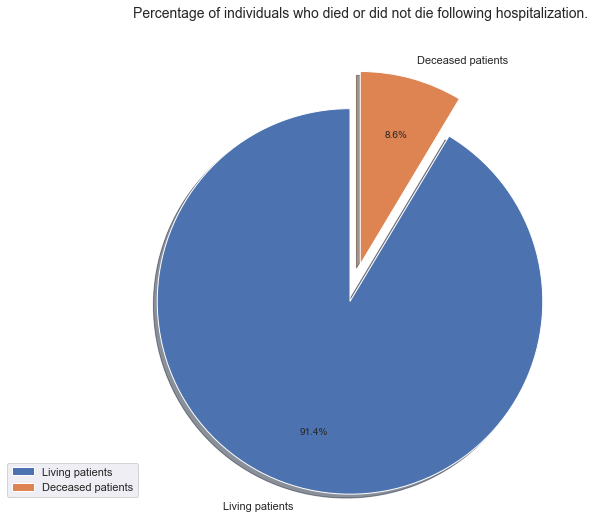

In [36]:
target = df.hospital_death.value_counts(normalize=True)
sns.set()

plt.figure(figsize = (19, 19))

plt.subplot(1,2,1)



labels= ["Living patients","Deceased patients"]

valeur = target
explode = (0.2,0.0)


plt.pie(valeur, labels=labels, autopct='%1.1f%%',startangle=90, shadow = True, explode = explode, pctdistance = 0.7, labeldistance = 1.1,)

plt.legend(labels,bbox_to_anchor=(0.05, 0.1))

plt.title("Percentage of individuals who died or did not die following hospitalization.", size =14);

Different risk factors

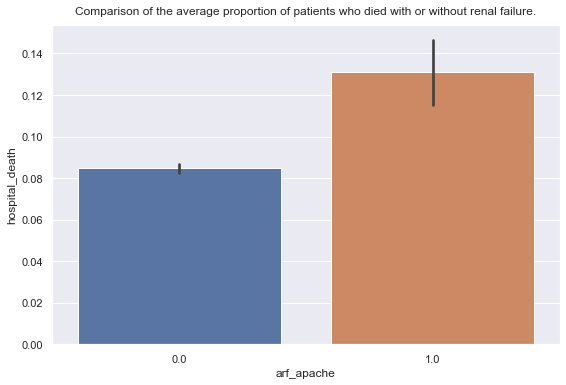

In [37]:
plt.figure(figsize = (20, 20)) 

plt.subplot(3,2,1)

plt.title("Comparison of the average proportion of patients who died with or without renal failure.", pad = 10)

sns.barplot(data = data, x = "arf_apache", y = "hospital_death");

Testing the patient's level of consciousness

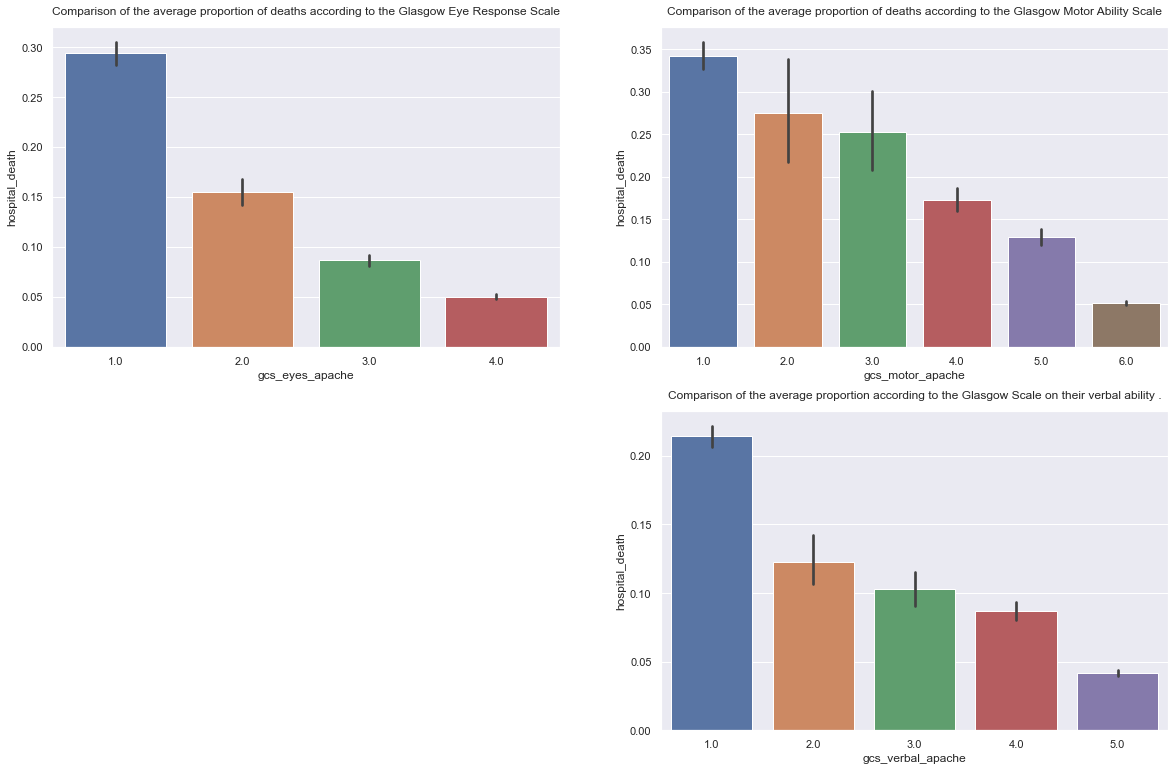

In [38]:
plt.figure(figsize = (20, 20)) 

plt.subplot(3,2,1)

plt.title("Comparison of the average proportion of deaths according to the Glasgow Eye Response Scale", pad = 12)

sns.barplot(data = data, x = "gcs_eyes_apache", y = "hospital_death")

plt.subplot(3,2,2)

plt.title("Comparison of the average proportion of deaths according to the Glasgow Motor Ability Scale", pad = 12)

sns.barplot(data = data, x = "gcs_motor_apache", y = "hospital_death")


plt.subplot(3,2,4)

plt.title("Comparison of the average proportion according to the Glasgow Scale on their verbal ability .", pad = 12)


sns.barplot(data = data, x= "gcs_verbal_apache", y = "hospital_death");

Heart rate

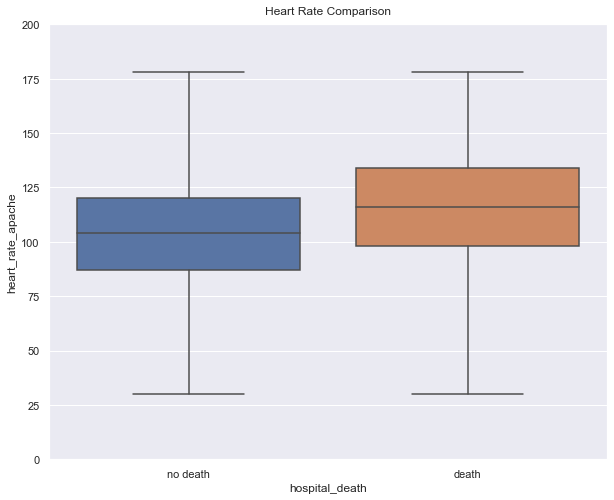

In [39]:
plt.figure(figsize = (10, 8)) 



plt.title("Heart Rate Comparison", pad = 10)

c =sns.boxplot(data = data, y = "heart_rate_apache", x = "hospital_death",whis=5);
c.set_xticklabels(["no death", "death"])
c.set_ylim(0,200);

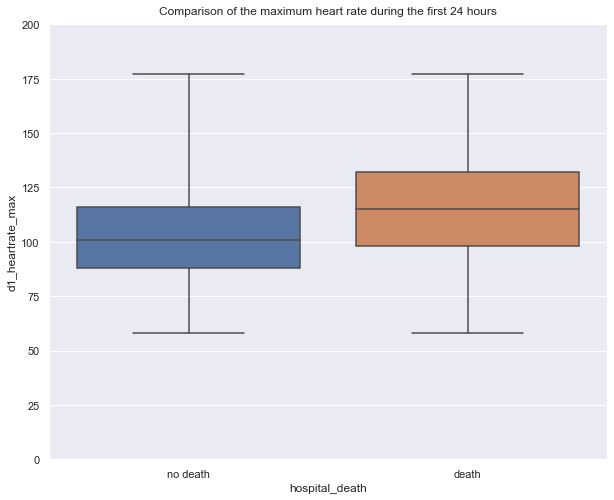

In [40]:
plt.figure(figsize = (10, 8)) 



plt.title("Comparison of the maximum heart rate during the first 24 hours", pad = 10)

c_d1_max = sns.boxplot(data = data, y = "d1_heartrate_max", x = "hospital_death",whis=5);

c_d1_max.set_xticklabels(["no death", "death"])
c_d1_max.set_ylim(0,200);

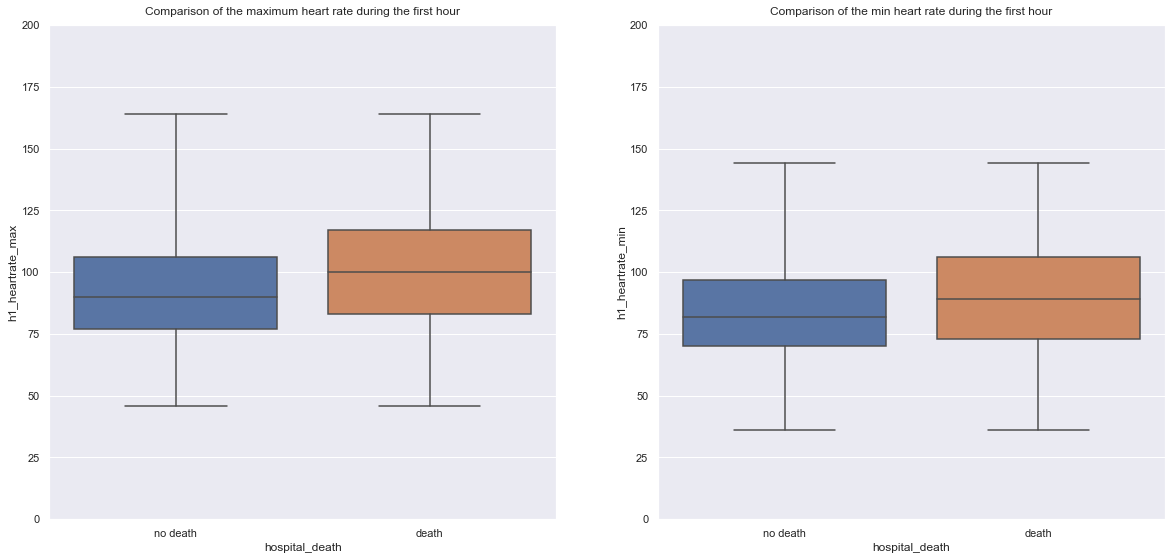

In [41]:
plt.figure(figsize = (20, 20)) 

plt.subplot(2,2,1)

plt.title("Comparison of the maximum heart rate during the first hour", pad = 10)

c_h1_max= sns.boxplot(data = data, y = "h1_heartrate_max", x = "hospital_death",whis=5);
c_h1_max.set_xticklabels(["no death", "death"])
c_h1_max.set_ylim(0,200);

plt.subplot(2,2,2)

plt.title("Comparison of the min heart rate during the first hour", pad = 10)

c_h1_min =sns.boxplot(data = data, y = "h1_heartrate_min", x = "hospital_death",whis=5);


c_h1_min.set_xticklabels(["no death", "death"])
c_h1_min.set_ylim(0,200);

Blood pressure

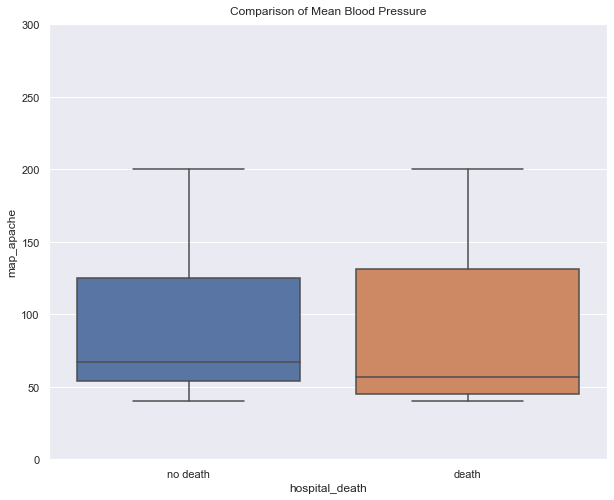

In [42]:
plt.figure(figsize = (10, 8)) 

plt.title("Comparison of Mean Blood Pressure", pad = 10)

p = sns.boxplot(data = data, y = "map_apache", x = "hospital_death",whis=5);
p.set_xticklabels(["no death", "death"])
p.set_ylim(0,300);

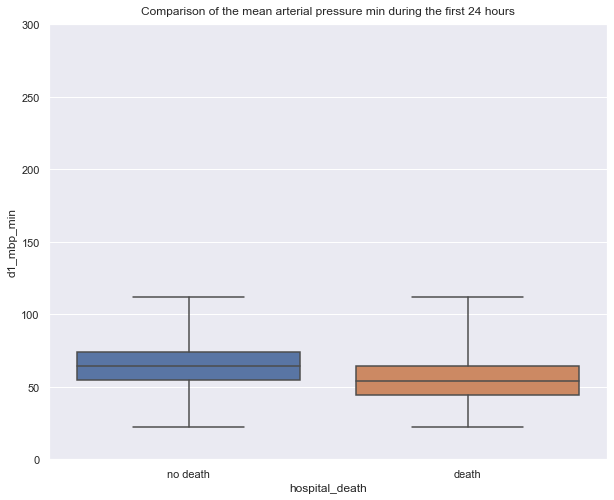

In [43]:
plt.figure(figsize = (10, 8)) 



plt.title("Comparison of the mean arterial pressure min during the first 24 hours", pad = 10)

mbp_d1_min= sns.boxplot(data = data, y = "d1_mbp_min", x = "hospital_death",whis=5)

mbp_d1_min.set_xticklabels(["no death", "death"])
mbp_d1_min.set_ylim(0,300);

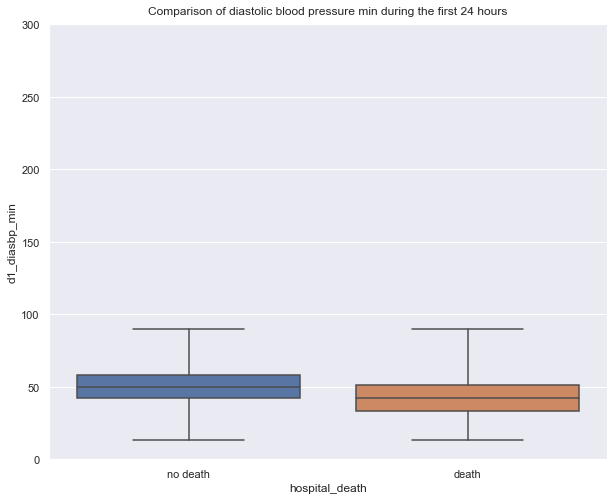

In [44]:
plt.figure(figsize = (10, 8)) 



plt.title("Comparison of diastolic blood pressure min during the first 24 hours", pad = 10)

dias_min = sns.boxplot(data = data, y = "d1_diasbp_min", x = "hospital_death",whis=5);

dias_min.set_xticklabels(["no death", "death"])
dias_min.set_ylim(0,300);

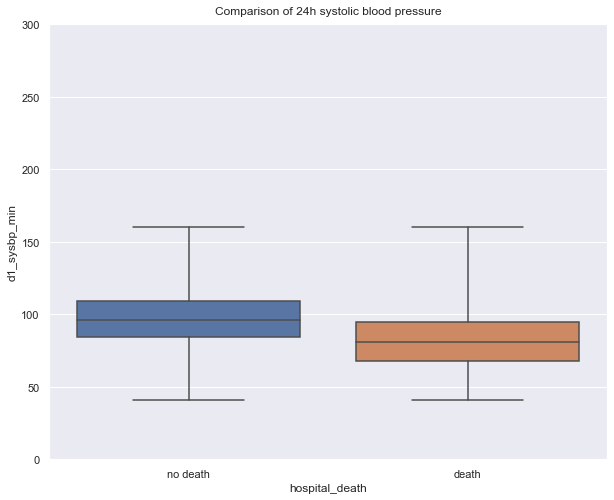

In [45]:
plt.figure(figsize = (10, 8)) 



plt.title("Comparison of 24h systolic blood pressure", pad = 10)

sysbp_min = sns.boxplot(data = data, y = "d1_sysbp_min", x = "hospital_death",whis=5);


sysbp_min.set_xticklabels(["no death", "death"])
sysbp_min.set_ylim(0,300);

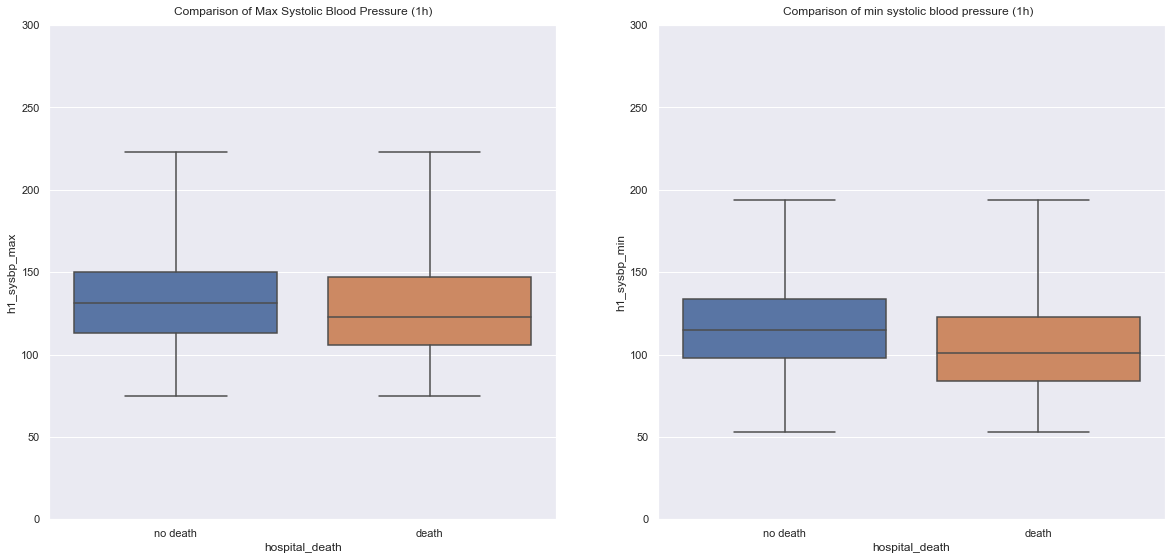

In [46]:
plt.figure(figsize = (20, 20)) 


plt.subplot(2,2,1)

plt.title("Comparison of Max Systolic Blood Pressure (1h)", pad = 10)

h1_sysbp_max = sns.boxplot(data = data, y = "h1_sysbp_max", x = "hospital_death",whis=5)
h1_sysbp_max.set_xticklabels(["no death", "death"])
h1_sysbp_max.set_ylim(0,300);

plt.subplot(2,2,2)

plt.title("Comparison of min systolic blood pressure (1h)  ", pad = 10)

h1_sysbp_min = sns.boxplot(data = data, y = "h1_sysbp_min", x = "hospital_death",whis=3);
h1_sysbp_min.set_xticklabels(["no death", "death"])
h1_sysbp_min.set_ylim(0,300);


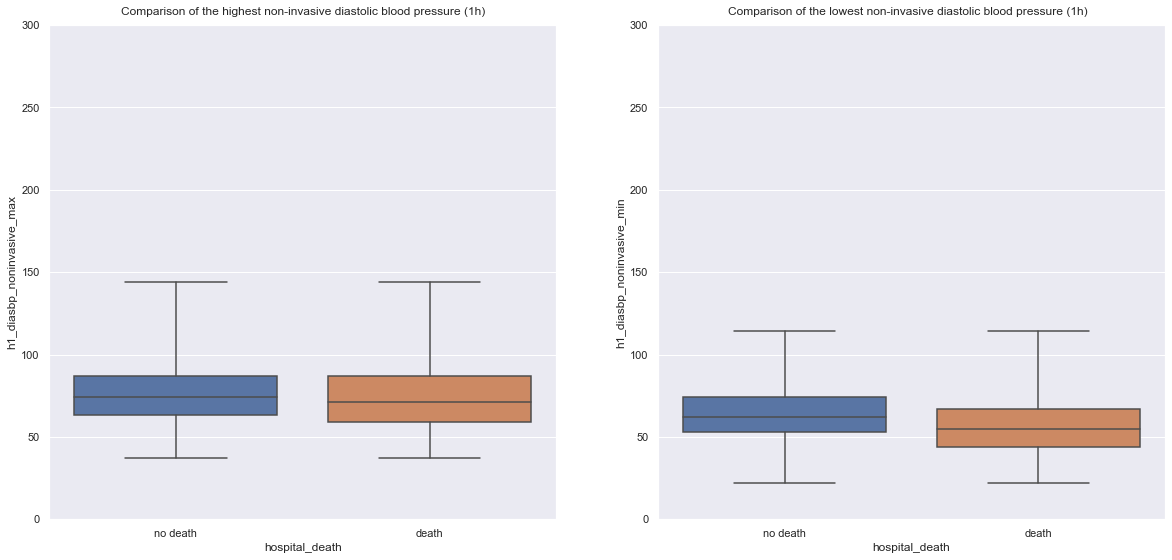

In [47]:
plt.figure(figsize = (20, 20)) 


plt.subplot(2,2,1)

plt.title("Comparison of the highest non-invasive diastolic blood pressure (1h)", pad = 10)

h1_diasbp_noninvasive_max= sns.boxplot(data = data, y = "h1_diasbp_noninvasive_max", x = "hospital_death",whis=5)
h1_diasbp_noninvasive_max.set_xticklabels(["no death", "death"])
h1_diasbp_noninvasive_max.set_ylim(0,300);


plt.subplot(2,2,2)

plt.title("Comparison of the lowest non-invasive diastolic blood pressure (1h)  ", pad = 10)

h1_diasbp_noninvasive_min = sns.boxplot(data = data, y = "h1_diasbp_noninvasive_min", x = "hospital_death",whis=5);
h1_diasbp_noninvasive_min.set_xticklabels(["no death", "death"])
h1_diasbp_noninvasive_min.set_ylim(0,300);

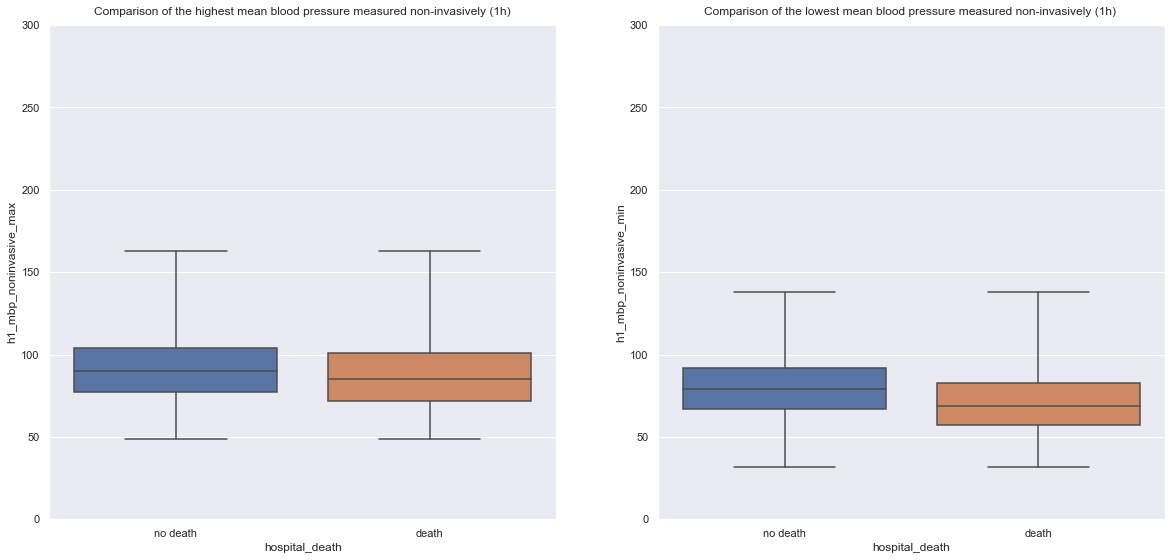

In [48]:
plt.figure(figsize = (20, 20)) 


plt.subplot(2,2,1)

plt.title("Comparison of the highest mean blood pressure measured non-invasively (1h)", pad = 10)

h1_mbp_noninvasive_max = sns.boxplot(data = data, y = "h1_mbp_noninvasive_max", x = "hospital_death",whis=5)
h1_mbp_noninvasive_max.set_xticklabels(["no death", "death"])
h1_mbp_noninvasive_max.set_ylim(0,300);

plt.subplot(2,2,2)

plt.title("Comparison of the lowest mean blood pressure measured non-invasively (1h) ", pad = 10)

h1_mbp_noninvasive_min = sns.boxplot(data = data, y = "h1_mbp_noninvasive_min", x = "hospital_death",whis=5);
h1_mbp_noninvasive_min.set_xticklabels(["no death", "death"])
h1_mbp_noninvasive_min.set_ylim(0,300);


Respiratory characteristics


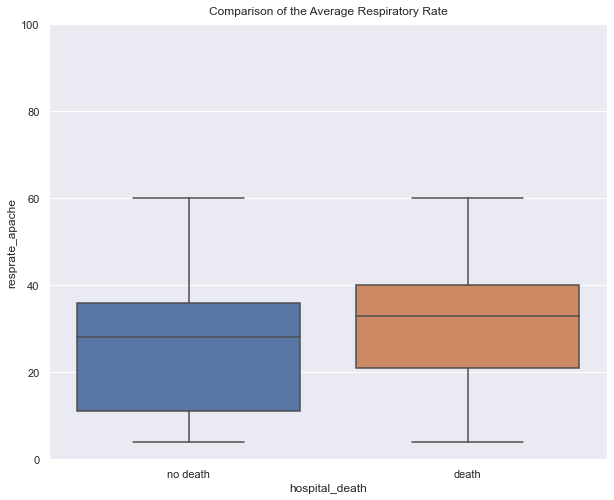

In [49]:
plt.figure(figsize = (10, 8)) 



plt.title("Comparison of the Average Respiratory Rate", pad = 10)

resprate_apache= sns.boxplot(data = data, y = "resprate_apache", x = "hospital_death",whis=3);

resprate_apache.set_xticklabels(["no death", "death"])
resprate_apache.set_ylim(0,100);

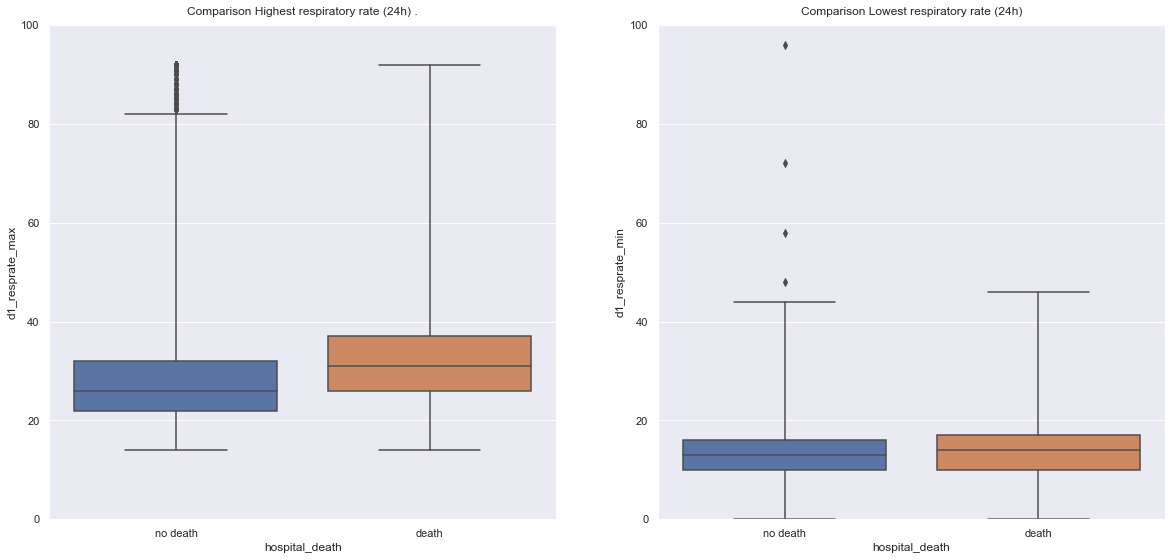

In [50]:
plt.figure(figsize = (20, 20)) 

plt.subplot(2,2,1)

plt.title("Comparison Highest respiratory rate (24h) .", pad = 10)


d1_resprate_max=sns.boxplot(data = data, y = "d1_resprate_max", x = "hospital_death",whis=5)
d1_resprate_max.set_xticklabels(["no death", "death"])
d1_resprate_max.set_ylim(0,100);


plt.subplot(2,2,2)

plt.title("Comparison Lowest respiratory rate (24h)", pad = 10)


d1_resprate_min= sns.boxplot(data = data, y = "d1_resprate_min", x = "hospital_death",whis=5);

d1_resprate_min.set_xticklabels(["no death", "death"])
d1_resprate_min.set_ylim(0,100);

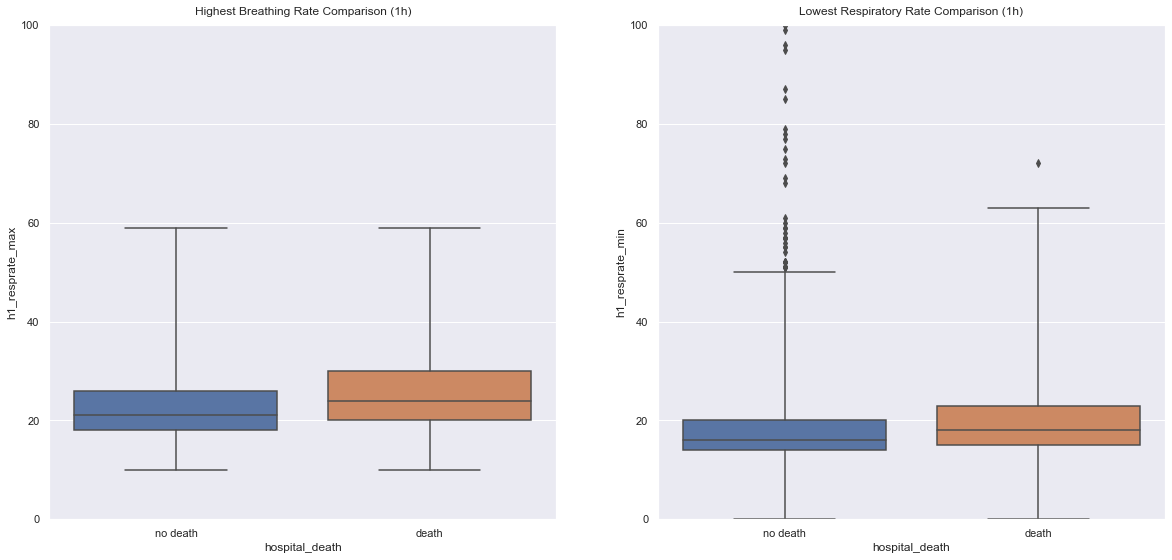

In [51]:
plt.figure(figsize = (20, 20)) 

plt.subplot(2,2,1)

plt.title("Highest Breathing Rate Comparison (1h)", pad = 10)


h1_resprate_max = sns.boxplot(data = data, y = "h1_resprate_max", x = "hospital_death",whis=5)
h1_resprate_max.set_xticklabels(["no death", "death"])
h1_resprate_max.set_ylim(0,100);



plt.subplot(2,2,2)

plt.title("Lowest Respiratory Rate Comparison (1h)", pad = 10)


h1_resprate_min= sns.boxplot(data = data, y = "h1_resprate_min", x = "hospital_death",whis=5);

h1_resprate_min.set_xticklabels(["no death", "death"])
h1_resprate_min.set_ylim(0,100);

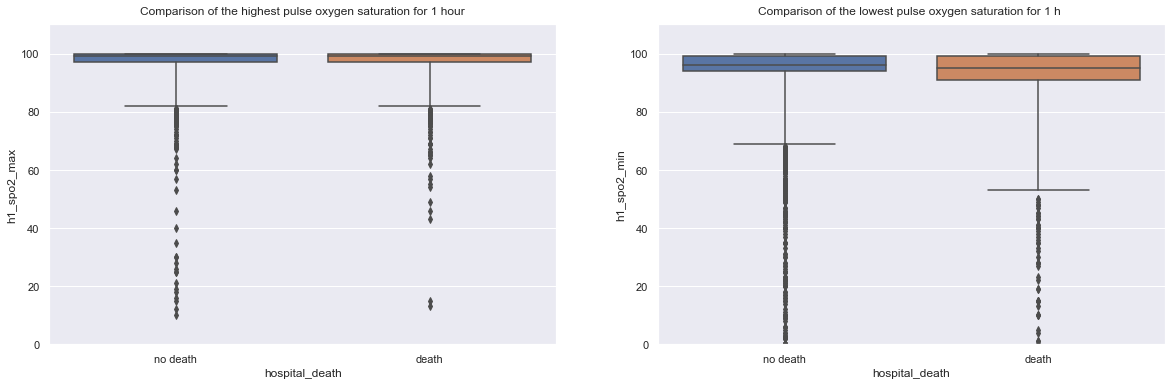

In [52]:
plt.figure(figsize = (20, 20)) 

plt.subplot(3,2,1)

plt.title("Comparison of the highest pulse oxygen saturation for 1 hour", pad = 10)

sh1_spo2_max=sns.boxplot(data = data, y = "h1_spo2_max", x = "hospital_death",whis=5)

sh1_spo2_max.set_xticklabels(["no death", "death"])
sh1_spo2_max.set_ylim(0,110);


plt.subplot(3,2,2)

plt.title("Comparison of the lowest pulse oxygen saturation for 1 h ", pad = 10)

h1_spo2_min =sns.boxplot(data = data, y = "h1_spo2_min", x = "hospital_death",whis=5);

h1_spo2_min.set_xticklabels(["no death", "death"])
h1_spo2_min.set_ylim(0,110);

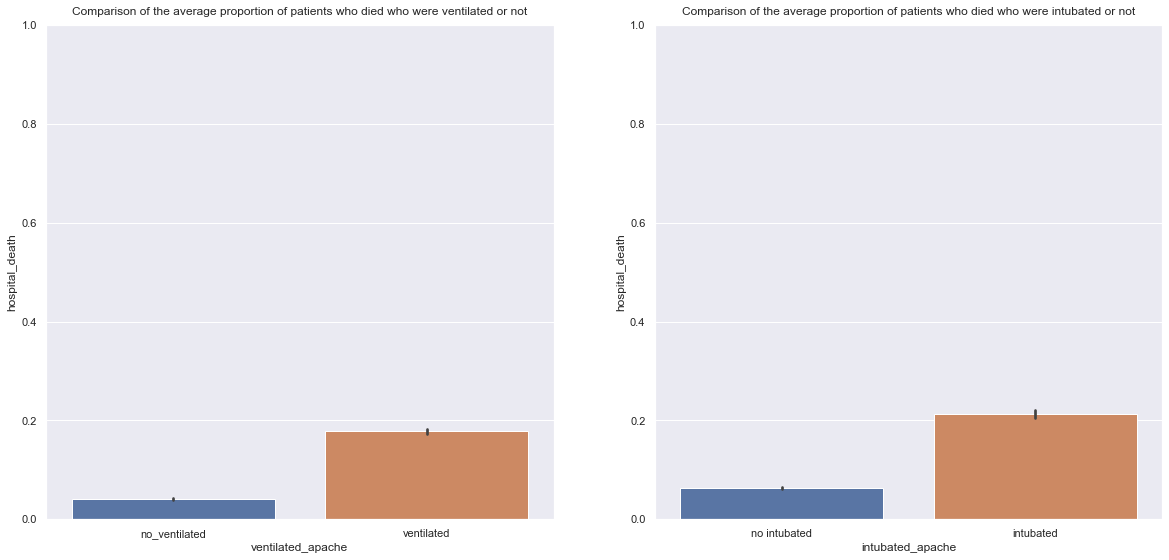

In [53]:
plt.figure(figsize = (20, 20)) 

plt.subplot(2,2,1)

plt.title("Comparison of the average proportion of patients who died who were ventilated or not", pad = 10)

ventilated_apache= sns.barplot(data = data, x = "ventilated_apache",  y = "hospital_death");

ventilated_apache.set_xticklabels(["no_ventilated", "ventilated"])
ventilated_apache.set_ylim(0,1);


plt.subplot(2,2,2)

plt.title("Comparison of the average proportion of patients who died who were intubated or not", pad = 10)

intubated_apache=sns.barplot(data = data, x = "intubated_apache",  y = "hospital_death");

intubated_apache.set_xticklabels(["no intubated", "intubated"])
intubated_apache.set_ylim(0,1);

Body temperature

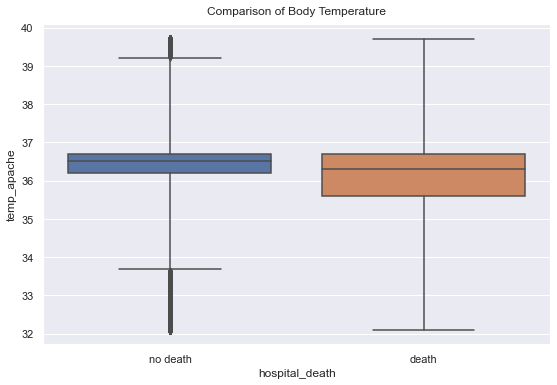

In [54]:
plt.figure(figsize = (20, 20)) 

plt.subplot(3,2,1)

plt.title("Comparison of Body Temperature", pad = 10)

temp = sns.boxplot(data = data, y = "temp_apache", x = "hospital_death",whis=5)
temp.set_xticklabels(["no death", "death"]);

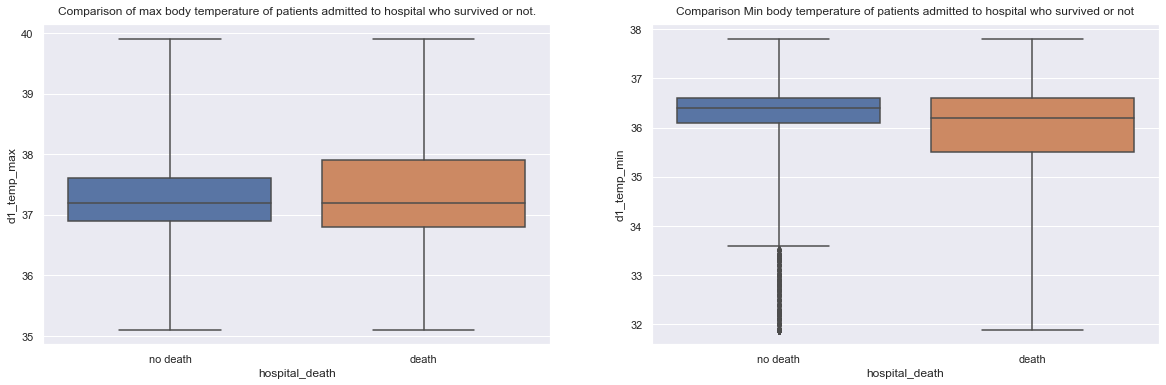

In [55]:
plt.figure(figsize = (20, 20)) 


plt.subplot(3,2,3)

plt.title("Comparison of max body temperature of patients admitted to hospital who survived or not.", pad = 10)


temp_max = sns.boxplot(data = data, y = "d1_temp_max", x = "hospital_death",whis=5)
temp_max.set_xticklabels(["no death", "death"]);


plt.subplot(3,2,4)

plt.title("Comparison Min body temperature of patients admitted to hospital who survived or not", pad = 10)


temp_min = sns.boxplot(data =data, y = "d1_temp_min", x = "hospital_death",whis=5);
temp_min.set_xticklabels(["no death", "death"]);

Concentration of nutrients

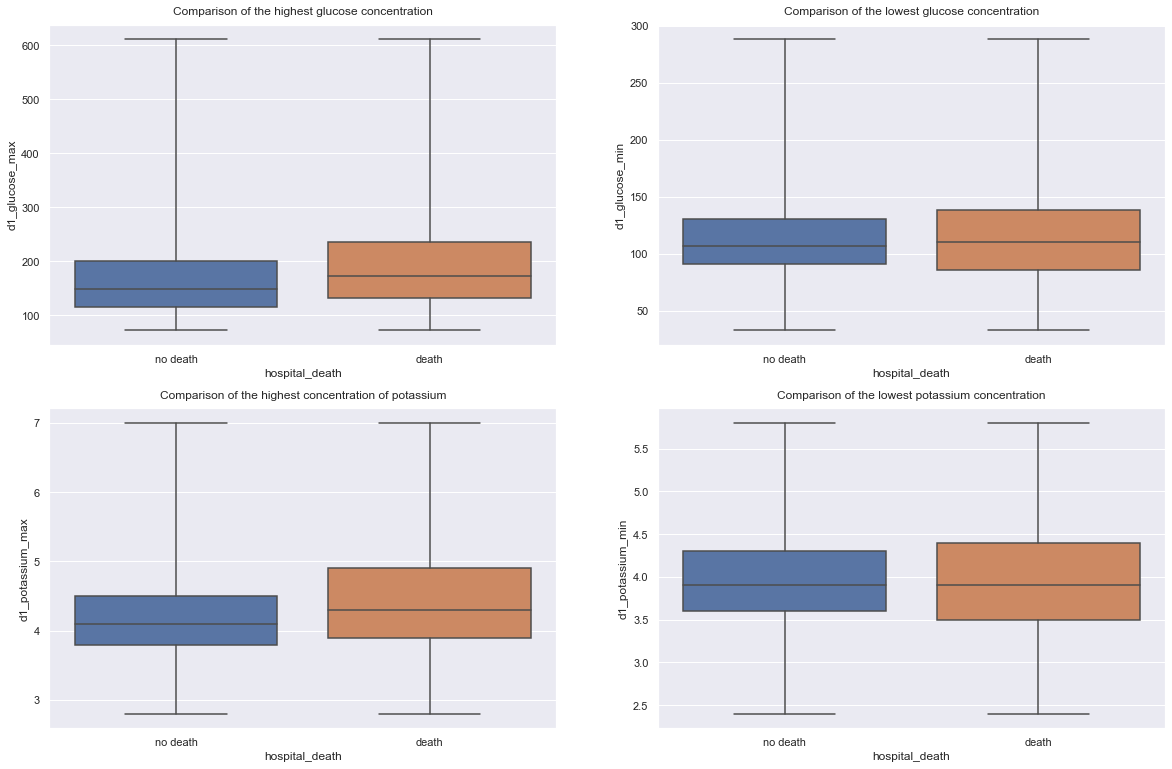

In [56]:
plt.figure(figsize = (20, 20)) 

plt.subplot(3,2,1)

plt.title("Comparison of the highest glucose concentration", pad = 10)

glu_max = sns.boxplot(data = data, y = "d1_glucose_max", x = "hospital_death",whis=5)
glu_max.set_xticklabels(["no death", "death"]);

plt.subplot(3,2,2)

plt.title("Comparison of the lowest glucose concentration", pad = 10)

glu_min = sns.boxplot(data = data, y = "d1_glucose_min", x = "hospital_death",whis=5)
glu_min.set_xticklabels(["no death", "death"]);

plt.subplot(3,2,3)

plt.title("Comparison of the highest concentration of potassium", pad = 10)


pot_max = sns.boxplot(data = data, y = "d1_potassium_max", x = "hospital_death",whis=5)
pot_max.set_xticklabels(["no death", "death"]);

plt.subplot(3,2,4)

plt.title("Comparison of the lowest potassium concentration", pad = 10)


pot_min = sns.boxplot(data = data, y = "d1_potassium_min", x = "hospital_death",whis=5);
pot_min.set_xticklabels(["no death", "death"]);

Associated pathologies already existing in the patient

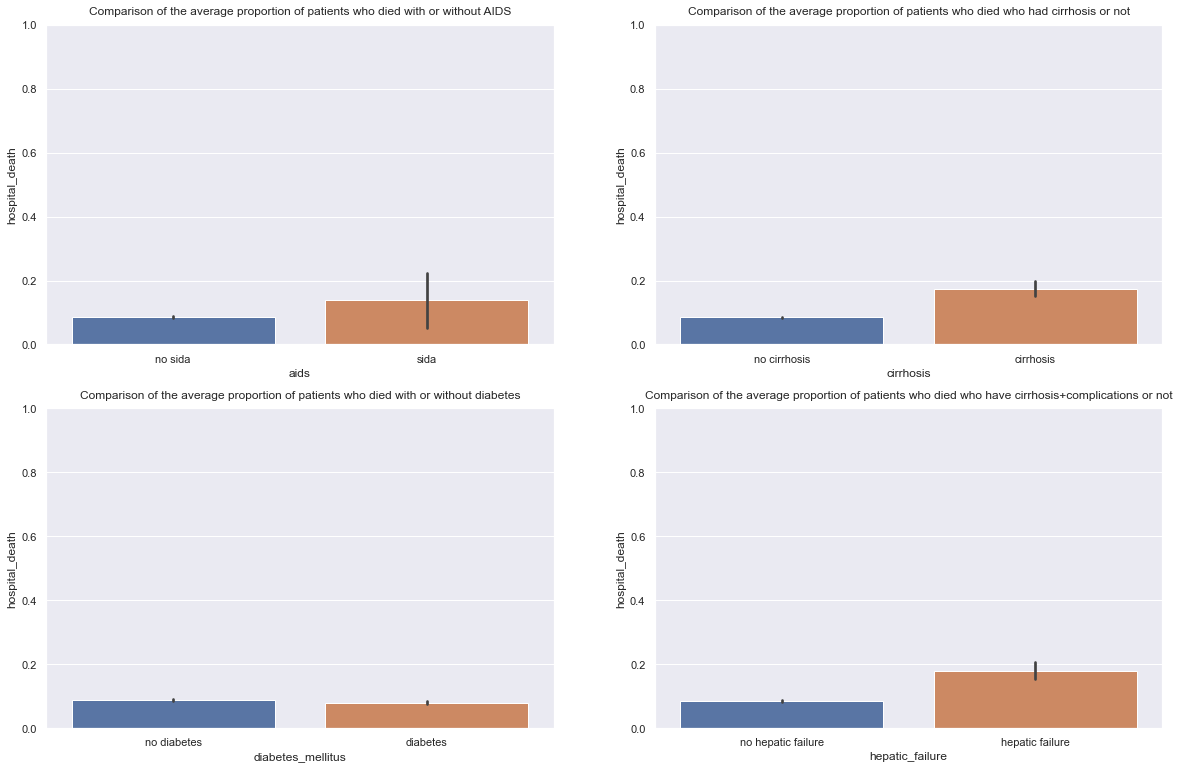

In [57]:
plt.figure(figsize = (20, 20)) 

plt.subplot(3,2,1)

plt.title("Comparison of the average proportion of patients who died with or without AIDS", pad = 10)

aids= sns.barplot(data = data, x = "aids",  y = "hospital_death");
aids.set_ylim(0,1);
aids.set_xticklabels(["no sida", "sida"]);

plt.subplot(3,2,2)

plt.title("Comparison of the average proportion of patients who died who had cirrhosis or not", pad = 10)

cir = sns.barplot(data = data, x = "cirrhosis",  y = "hospital_death");
cir.set_ylim(0,1);
cir.set_xticklabels(["no cirrhosis", "cirrhosis"]);

plt.subplot(3,2,3)

plt.title("Comparison of the average proportion of patients who died with or without diabetes", pad = 10)

dia = sns.barplot(data = data, x = "diabetes_mellitus",  y = "hospital_death");
dia.set_ylim(0,1);
dia.set_xticklabels(["no diabetes", "diabetes"]);

plt.subplot(3,2,4)

plt.title("Comparison of the average proportion of patients who died who have cirrhosis+complications or not", pad = 10)

hepa= sns.barplot(data = data, x = "hepatic_failure",  y = "hospital_death");
hepa.set_ylim(0,1);
hepa.set_xticklabels(["no hepatic failure", "hepatic failure"]);

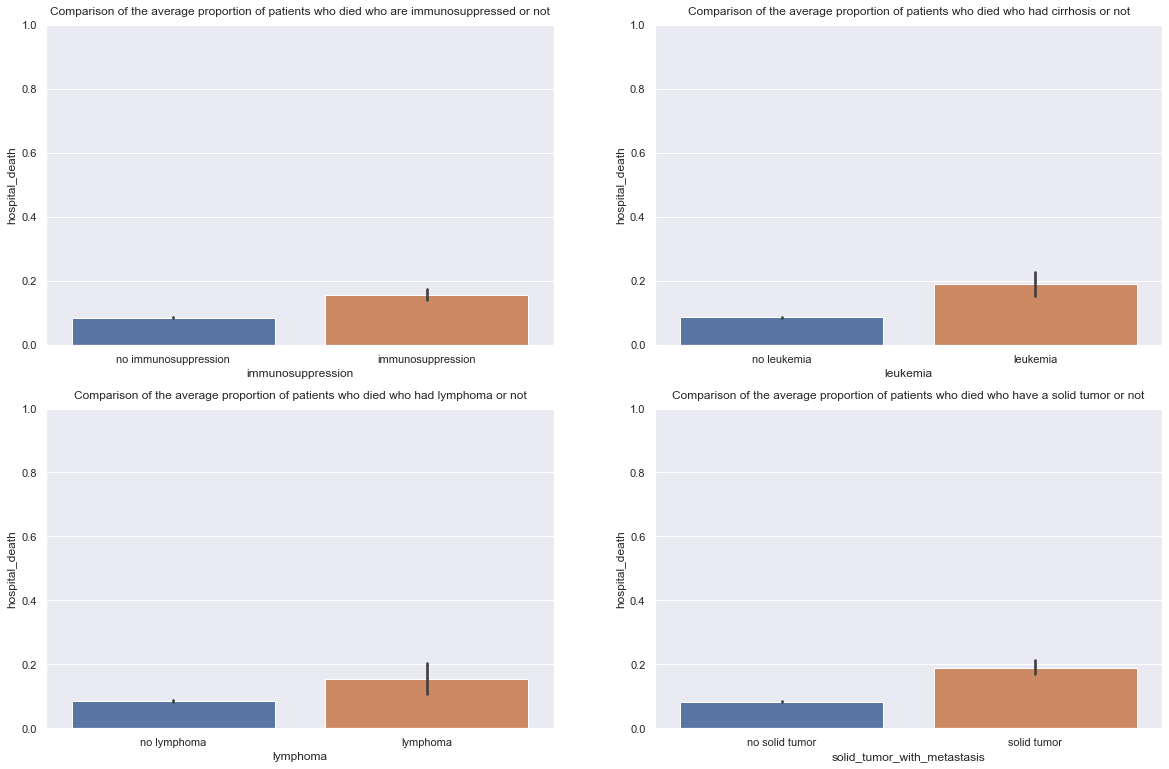

In [58]:
plt.figure(figsize = (20, 20)) 

plt.subplot(3,2,1)

plt.title("Comparison of the average proportion of patients who died who are immunosuppressed or not", pad = 10)

imm= sns.barplot(data = data, x = "immunosuppression",  y = "hospital_death");
imm.set_ylim(0,1);
imm.set_xticklabels(["no immunosuppression", "immunosuppression"]);

plt.subplot(3,2,2)

plt.title("Comparison of the average proportion of patients who died who had cirrhosis or not", pad = 10)

leu=sns.barplot(data = data, x = "leukemia",  y = "hospital_death");
leu.set_ylim(0,1);
leu.set_xticklabels(["no leukemia", "leukemia"]);

plt.subplot(3,2,3)

plt.title("Comparison of the average proportion of patients who died who had lymphoma or not", pad = 10)

lym=sns.barplot(data = data, x = "lymphoma",  y = "hospital_death");
lym.set_ylim(0,1);
lym.set_xticklabels(["no lymphoma", "lymphoma"]);

plt.subplot(3,2,4)

plt.title("Comparison of the average proportion of patients who died who have a solid tumor or not", pad = 10)

stm = sns.barplot(data = data, x = "solid_tumor_with_metastasis",  y = "hospital_death");
stm.set_ylim(0,1);
stm.set_xticklabels(["no solid tumor", "solid tumor"]);

Physical characteristics of the patient

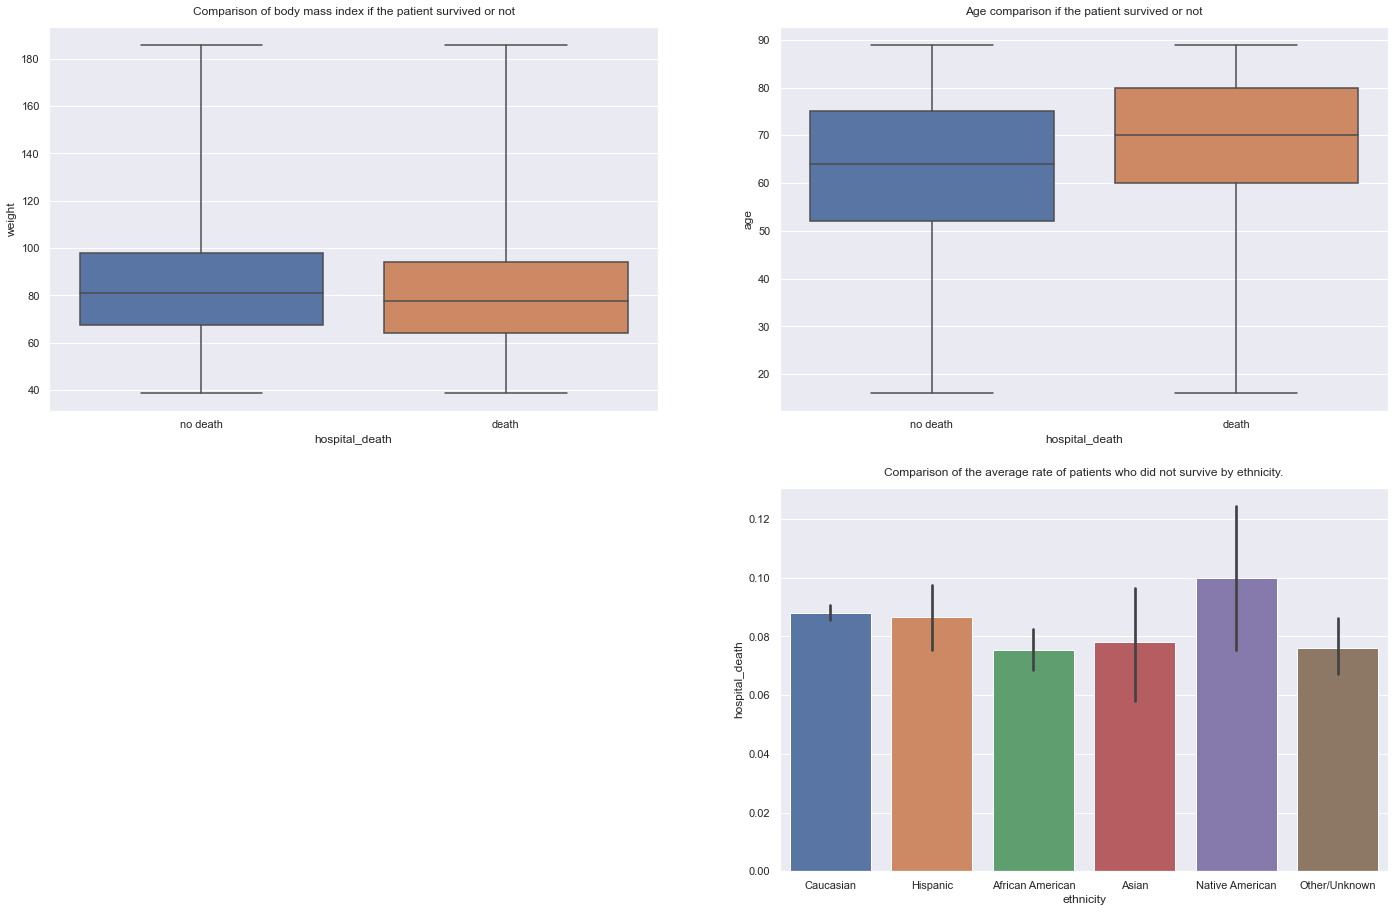

In [59]:
plt.figure(figsize = (24, 24))

plt.subplot(3,2,1)

plt.title("Comparison of body mass index if the patient survived or not", pad = 12)

weight = sns.boxplot(data = data, y = "weight", x = "hospital_death",whis=5)
weight.set_xticklabels(["no death", "death"]);

plt.subplot(3,2,2)

plt.title("Age comparison if the patient survived or not", pad = 12)

age=sns.boxplot(data = data, y = "age", x = "hospital_death",whis=5)
age.set_xticklabels(["no death", "death"]);




plt.subplot(3,2,4)

plt.title("Comparison of the average rate of patients who did not survive by ethnicity.", pad = 12)

ethnicity = sns.barplot(data = data, x= "ethnicity", y = "hospital_death");

In [60]:
column_1 = ['age','gender','hospital_death']
fig = px.histogram(data[column_1],x='age',y='hospital_death',color='gender',
                    marginal='box',
                    hover_data=data[column_1].columns, title="Study of the influence of age and gender on hospital survival",
                   labels=dict(age="age (years)"))

fig.update_layout(
    font_family="Times New Roman",
    font_color="blue",
    title_font_family="Rockwell",
    title_font_color="purple",
    legend_title_font_color="grey",
    #legend=dict(
        #title=None, orientation="h", y=1, yanchor="bottom", x=0.5, xanchor="center")
)
#fig.update_xaxes(title_font_family="Arial")
fig.show()

Type of care and unit

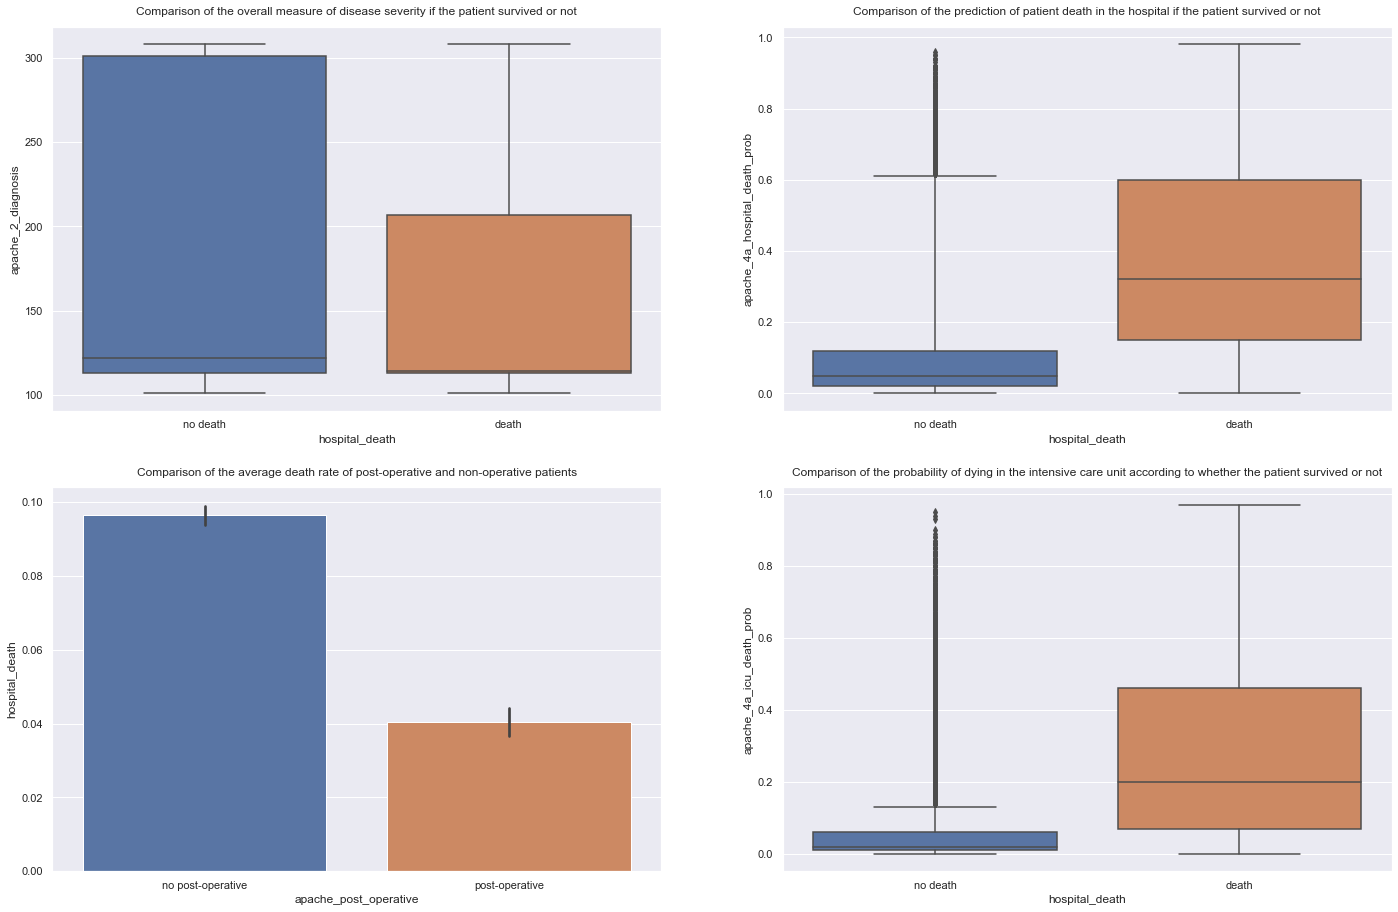

In [61]:
plt.figure(figsize = (24, 24))

plt.subplot(3,2,1)

plt.title("Comparison of the overall measure of disease severity if the patient survived or not", pad = 12)

apache_d =sns.boxplot(data = data, y = "apache_2_diagnosis", x = "hospital_death",whis=5)
apache_d.set_xticklabels(["no death", "death"]);

plt.subplot(3,2,2)

plt.title("Comparison of the prediction of patient death in the hospital if the patient survived or not", pad = 12)

apache_hospi = sns.boxplot(data = data, y = "apache_4a_hospital_death_prob", x = "hospital_death",whis=5)
apache_hospi.set_xticklabels(["no death", "death"]);

plt.subplot(3,2,3)

plt.title("Comparison of the average death rate of post-operative and non-operative patients", pad = 12)

post_op = sns.barplot(data = data, x= "apache_post_operative", y= "hospital_death")
post_op.set_xticklabels(["no post-operative", "post-operative"]);


plt.subplot(3,2,4)

plt.title("Comparison of the probability of dying in the intensive care unit according to whether the patient survived or not", pad = 12)

apache_icu = sns.boxplot(data = data, y= "apache_4a_icu_death_prob", x = "hospital_death");
apache_icu.set_xticklabels(["no death", "death"]);

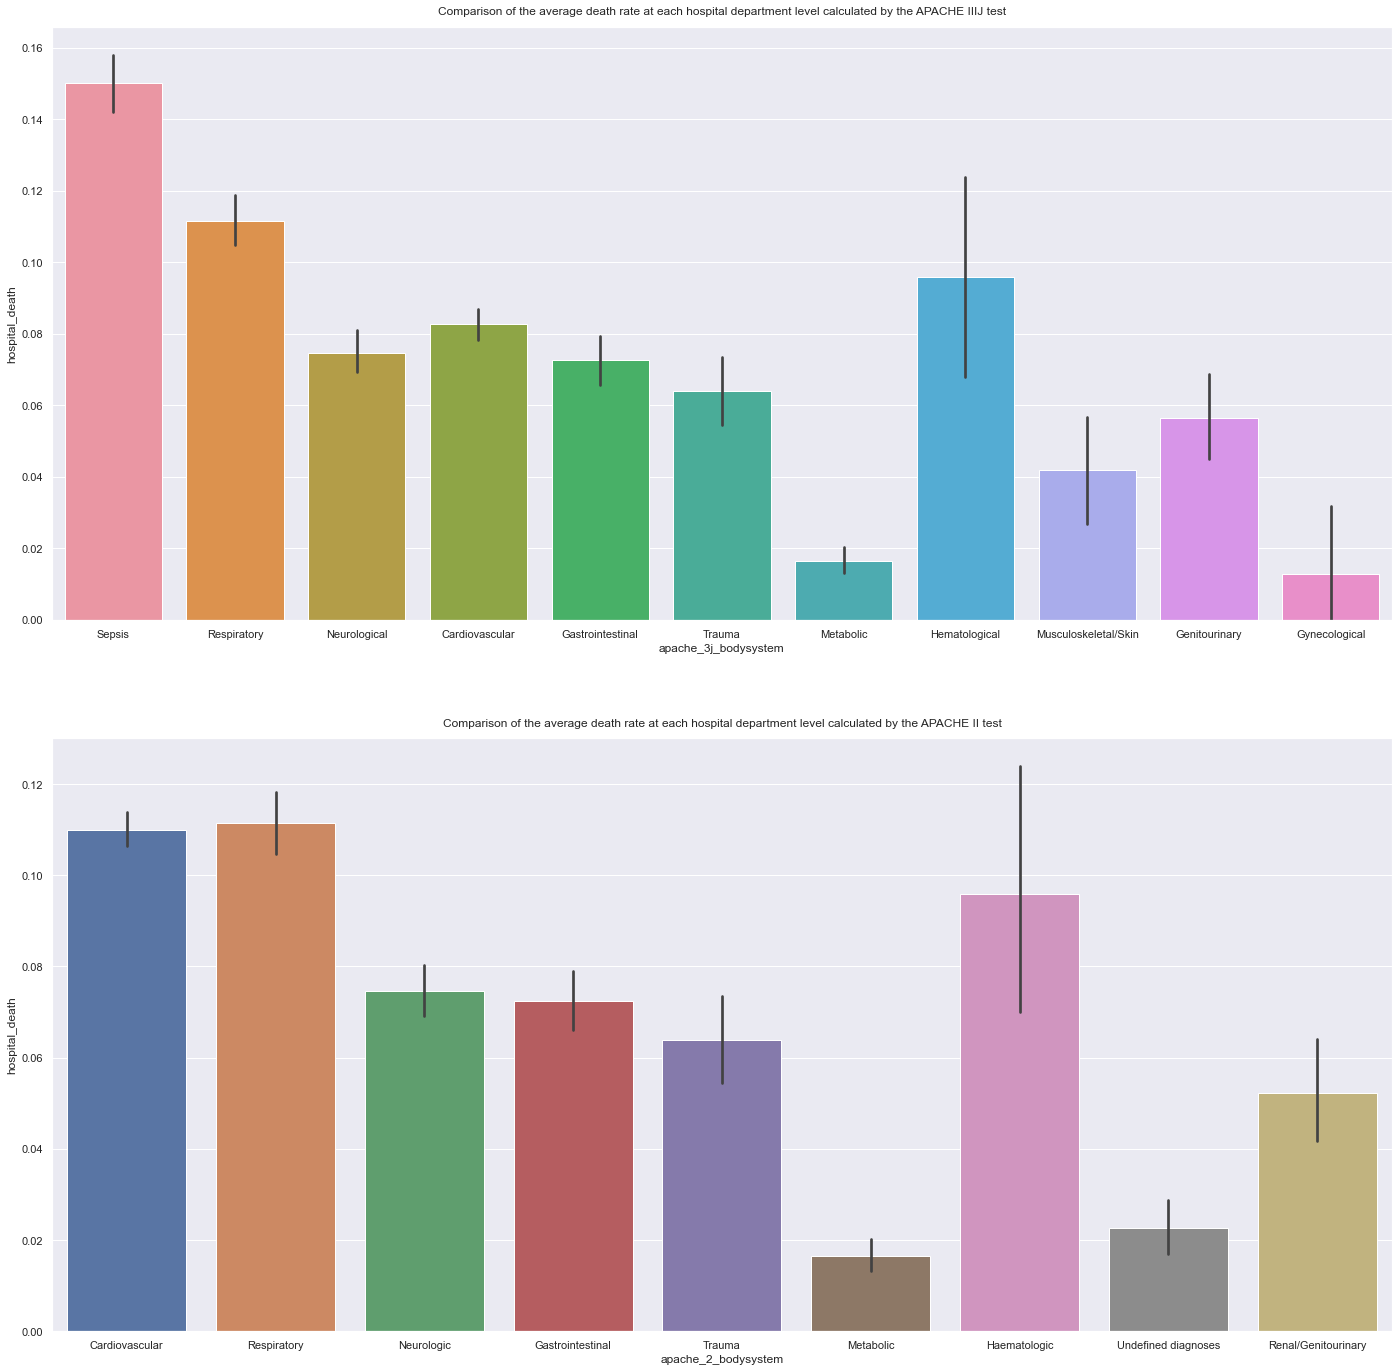

In [62]:
plt.figure(figsize = (24, 24))

plt.subplot(2,1,1)

plt.title("Comparison of the average death rate at each hospital department level calculated by the APACHE IIIJ test", pad = 12)

sns.barplot(data = data, x= "apache_3j_bodysystem", y= "hospital_death");

plt.subplot(2,1,2)

plt.title("Comparison of the average death rate at each hospital department level calculated by the APACHE II test", pad = 12)

sns.barplot(data = data, x= "apache_2_bodysystem", y= "hospital_death");

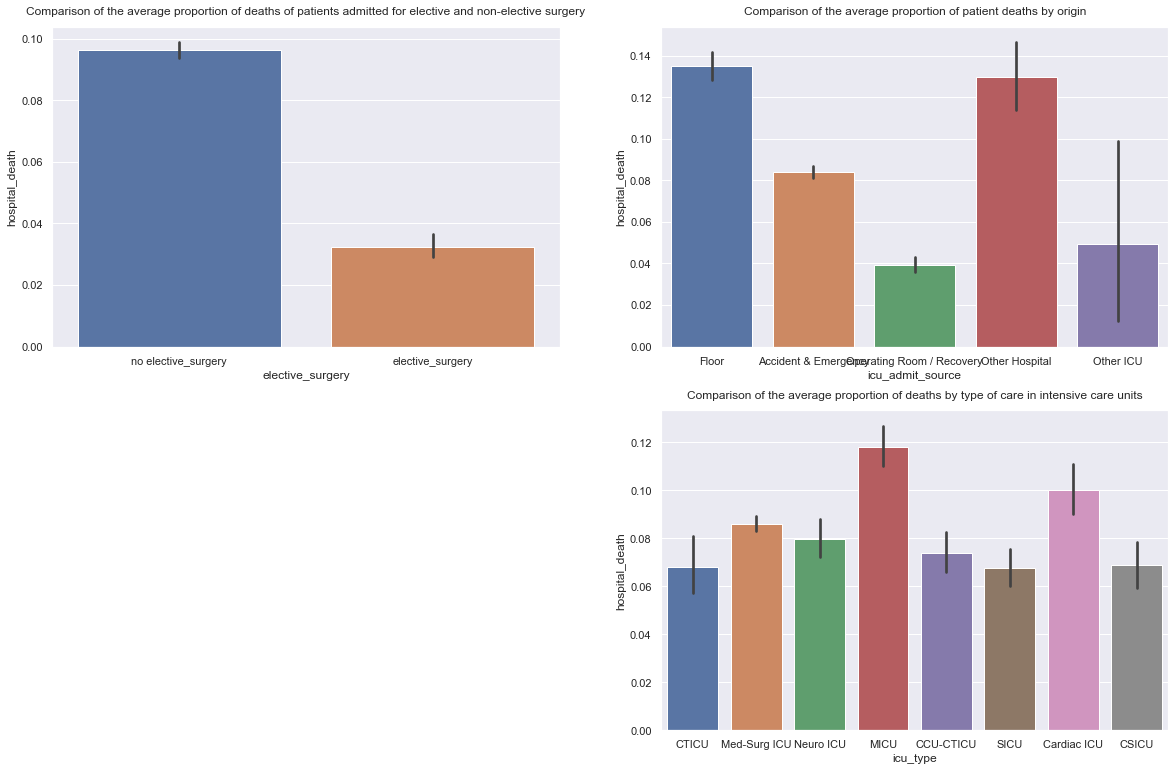

In [63]:
plt.figure(figsize = (20, 20))

plt.subplot(3,2,1)

plt.title("Comparison of the average proportion of deaths of patients admitted for elective and non-elective surgery", pad = 12)

es = sns.barplot(data = data, x = "elective_surgery", y = "hospital_death");
es.set_xticklabels(["no elective_surgery", "elective_surgery"]);


plt.subplot(3,2,2)

plt.title("Comparison of the average proportion of patient deaths by origin", pad = 12)

sns.barplot(data = data, x = "icu_admit_source", y = "hospital_death");


plt.subplot(3,2,4)

plt.title("Comparison of the average proportion of deaths by type of care in intensive care units", pad = 12)

sns.barplot(data = data, x = "icu_type", y = "hospital_death");

Modelisation

In [64]:
## target and features

target_name = 'hospital_death'

y = df.loc[:,target_name]
X = df.loc[:,[c for c in df.columns if c!=target_name]] 

In [65]:
# Détermination des indices de positions des variables

idx = 0
numeric_features = []
numeric_indices = []
categorical_features = []
categorical_indices = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
        numeric_indices.append(idx)
    else :
        categorical_features.append(i)
        categorical_indices.append(idx)

    idx = idx + 1

print('Found numeric features ', numeric_features,' at positions ', numeric_indices)
print('Found categorical features ', categorical_features,' at positions ', categorical_indices)

Found numeric features  ['encounter_id', 'patient_id', 'hospital_id', 'age', 'bmi', 'elective_surgery', 'height', 'icu_id', 'pre_icu_los_days', 'weight', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'heart_rate_apache', 'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache', 'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min', 'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min', 'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min', 'h1_mbp_nonin

In [66]:
# Determination of the position indices of the variables

idx = 0
numeric_features = []
numeric_indices = []
categorical_features = []
categorical_indices = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
        numeric_indices.append(idx)
    else :
        categorical_features.append(i)
        categorical_indices.append(idx)

    idx = idx + 1

print('Found numeric features ', numeric_features,' at positions ', numeric_indices)
print('Found categorical features ', categorical_features,' at positions ', categorical_indices)

Found numeric features  ['encounter_id', 'patient_id', 'hospital_id', 'age', 'bmi', 'elective_surgery', 'height', 'icu_id', 'pre_icu_los_days', 'weight', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'heart_rate_apache', 'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache', 'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min', 'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min', 'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min', 'h1_mbp_nonin

In [67]:
# Standardisation
numeric_transformer = StandardScaler()
categorie_transformer =OneHotEncoder()
# OHE / dummyfication
featureencoder = ColumnTransformer(
    transformers=[   
        ('cat', categorie_transformer, categorical_indices),
        ('num', numeric_transformer, numeric_indices)
        ]
    )

X1 = featureencoder.fit_transform(X)

In [68]:
#Use of SMOTE to balance the two classes of the target

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X1, y)

In [69]:
print('Resampled dataset shape %s' % Counter(y_res))


Resampled dataset shape Counter({0: 52044, 1: 52044})


In [70]:
y = y_res
X1 = X_res

In [71]:
# Split dataset

X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.20,random_state=0,stratify= y)

LogisticRegression

In [72]:
print("Training model...")
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print("...Done.")

Training model...
...Done.


C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [73]:
# Predictions on training set

print("Predictions on train set...")
y_train_pred = classifier.predict(X_train)

# Predictions on training set

print("Predictions on test set...")
y_test_pred = classifier.predict(X_test)

print("...Done.")
print()

Predictions on train set...
Predictions on test set...
...Done.



In [74]:
print("f1-score on train set : ", f1_score(y_train, y_train_pred))
print("f1-score on test set : ", f1_score(y_test, y_test_pred))

f1-score on train set :  0.7895444795870142
f1-score on test set :  0.7848958081516221


[[33326  8309]
 [ 9058 32577]]


<AxesSubplot:>

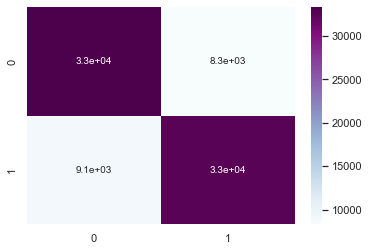

In [77]:
#Confusion matrix

cm=confusion_matrix(y_train,y_train_pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

[[8252 2157]
 [2292 8117]]


<AxesSubplot:>

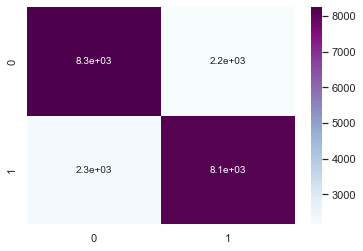

In [76]:
#Confusion matrix

cm=confusion_matrix(y_test,y_test_pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

Evaluation of the performance of the LogisticRegression model by cross-validation


Train set

In [78]:
print("5-fold cross-validation...")
scores = cross_val_score(classifier, X_train, y_train, scoring = 'f1', cv=5)
print('The cross-validated f1-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

5-fold cross-validation...


C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please a

The cross-validated f1-score is :  0.7887866532486187
The standard deviation is :  0.003425838597466405


C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Test set 

In [79]:
print("5-fold cross-validation...")
scores = cross_val_score(classifier, X_test, y_test, scoring = 'f1', cv=5)
print('The cross-validated f1-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

5-fold cross-validation...


C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please a

The cross-validated f1-score is :  0.7856951681976794
The standard deviation is :  0.009126266559569692


C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Dataset

In [80]:
print("5-fold cross-validation...")
scores = cross_val_score(classifier, X1, y, scoring = 'f1', cv=5)
print('The cross-validated f1-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

5-fold cross-validation...


C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please a

The cross-validated f1-score is :  0.7384474666409808
The standard deviation is :  0.034342445409087284


C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Conclusion on the model

Conclusion: robust model that generalizes, confirmed by cross-validation but the score is not satisfactory.

Optimization of hyperparameters for LogisticRegression

In [81]:
param_grid = [    
    {'penalty' : ['elasticnet','l1', 'l2','none'],
    'C' : np.logspace(-4, 4, 20),
    }
]

model = LogisticRegression(random_state =0, solver = "saga")

In [82]:
clf = GridSearchCV(model, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1, scoring = "f1")


In [83]:
best_clf = clf.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


100 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packa

In [84]:
best_clf.best_estimator_


LogisticRegression(C=4.281332398719396, penalty='l1', random_state=0,
                   solver='saga')

In [85]:
# Predictions on training set

print("Predictions on train set...")
y_train_pred_opt = best_clf.predict(X_train)

# Predictions on training set

print("Predictions on test set...")
y_test_pred_opt = best_clf.predict(X_test)

print("...Done.")
print()

Predictions on train set...
Predictions on test set...
...Done.



In [86]:
print("f1-score on train set : ", f1_score(y_train, y_train_pred_opt))
print("f1-score on test set : ", f1_score(y_test, y_test_pred_opt))

f1-score on train set :  0.7895081172764721
f1-score on test set :  0.7853140096618358


[[33313  8322]
 [ 9052 32583]]


<AxesSubplot:>

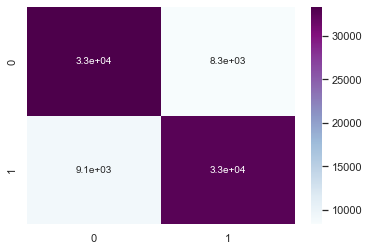

In [87]:
#Confusion matrix

cm=confusion_matrix(y_train,y_train_pred_opt)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

[[8246 2163]
 [2281 8128]]


<AxesSubplot:>

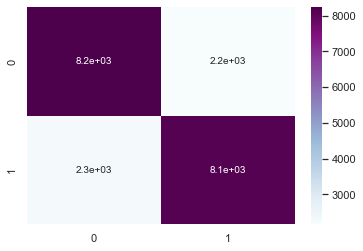

In [88]:
#Confusion matrix

cm=confusion_matrix(y_test,y_test_pred_opt)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

Evaluation of the optimized LogisticRegression model by cross-validation

On the whole dataset


In [89]:
print("5-fold cross-validation...")
scores = cross_val_score(clf, X1, y, scoring = 'f1', cv=5)
print('The cross-validated f1-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

5-fold cross-validation...
Fitting 5 folds for each of 80 candidates, totalling 400 fits


C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


100 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packa

Fitting 5 folds for each of 80 candidates, totalling 400 fits


C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


100 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packa

Fitting 5 folds for each of 80 candidates, totalling 400 fits


C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


100 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packa

Fitting 5 folds for each of 80 candidates, totalling 400 fits


C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


100 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packa

Fitting 5 folds for each of 80 candidates, totalling 400 fits


C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


100 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packa

The cross-validated f1-score is :  0.7470841944518872
The standard deviation is :  0.024597833955602923


Test set

In [90]:
print("5-fold cross-validation...")
scores = cross_val_score(clf, X_test, y_test, scoring = 'f1', cv=5)
print('The cross-validated f1-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

5-fold cross-validation...
Fitting 5 folds for each of 80 candidates, totalling 400 fits


C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


100 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packa

Fitting 5 folds for each of 80 candidates, totalling 400 fits


C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


100 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packa

Fitting 5 folds for each of 80 candidates, totalling 400 fits


C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


100 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packa

Fitting 5 folds for each of 80 candidates, totalling 400 fits


C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


100 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packa

Fitting 5 folds for each of 80 candidates, totalling 400 fits


C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


100 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packa

The cross-validated f1-score is :  0.7853578658285281
The standard deviation is :  0.010019232904731168


C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Conclusion on the optimized logistic regression model
Conclusion: Despite the optimized parameters of the logistic regression, we do not obtain a better score f1

Non linear model: Random forest

In [91]:
print("Training model...")
classifier_random =RandomForestClassifier(n_estimators = 30, random_state = 0, max_depth = 9,min_samples_leaf=10)
classifier_random.fit(X_train, y_train)
print("...Done.")

Training model...
...Done.


In [92]:
# Predictions on training set

print("Predictions on train set...")
y_train_pred_random = classifier_random.predict(X_train)

# Predictions on training set

print("Predictions on test set...")
y_test_pred_random = classifier_random.predict(X_test)

print("...Done.")
print()

Predictions on train set...
Predictions on test set...
...Done.



In [93]:
print("f1-score on train set : ", f1_score(y_train, y_train_pred_random))
print("f1-score on test set : ", f1_score(y_test, y_test_pred_random))

f1-score on train set :  0.9121947196663566
f1-score on test set :  0.9028248587570622


[[37103  4532]
 [ 2921 38714]]


<AxesSubplot:>

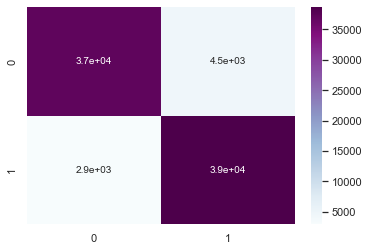

In [94]:
#Confusion matrix

cm=confusion_matrix(y_train,y_train_pred_random)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

[[9166 1243]
 [ 821 9588]]


<AxesSubplot:>

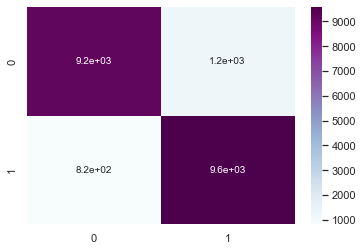

In [95]:
#Confusion matrix

cm=confusion_matrix(y_test,y_test_pred_random)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

Evaluation of the random forest model by cross-validation

Train set

In [96]:
print("5-fold cross-validation...")
scores = cross_val_score(classifier_random, X_train, y_train, scoring = 'f1', cv=5)
print('The cross-validated f1-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

5-fold cross-validation...
The cross-validated f1-score is :  0.905663428598011
The standard deviation is :  0.0017572319157251604


Test set

In [97]:
scores = cross_val_score(classifier_random, X_test, y_test, scoring = 'f1', cv=5)
print('The cross-validated f1-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

The cross-validated f1-score is :  0.890921941865518
The standard deviation is :  0.006181116500598398


Whole dataset

In [98]:
print("5-fold cross-validation...")
scores = cross_val_score(classifier_random, X1, y, scoring = 'f1', cv=5)
print('The cross-validated f1-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

5-fold cross-validation...
The cross-validated f1-score is :  0.8566541500903119
The standard deviation is :  0.06571864207593675


Conclusion on the random forest model

Conclusion: The random forest gives a higher f1 score than the logistic regression which 0.90 without over-fitting or under-fitting whose good prediction performance is confirmed by the cross-validation, both for the train/test and the whole dataset whose scores are very close or practically equivalent.

XGBoost

In [99]:
xgb=XGBClassifier(learning_rate=0.0015, max_depth=9, n_estimators = 71)

In [100]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.0015, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=9, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=71, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [101]:

# Predictions on training set

print("Predictions on train set...")
y_train_pred_xgb = xgb.predict(X_train)

# Predictions on training set

print("Predictions on test set...")
y_test_pred_xgb= xgb.predict(X_test)

print("...Done.")
print()

Predictions on train set...
Predictions on test set...
...Done.



In [102]:
print("f1-score on train set : ", f1_score(y_train, y_train_pred_xgb))
print("f1-score on test set : ", f1_score(y_test, y_test_pred_xgb))

f1-score on train set :  0.9218685905943103
f1-score on test set :  0.9099389335000241


[[38589  3046]
 [ 3430 38205]]


<AxesSubplot:>

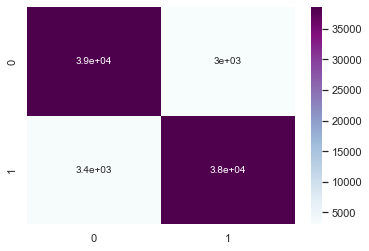

In [103]:
#Confusion matrix

cm=confusion_matrix(y_train,y_train_pred_xgb)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

[[9483  926]
 [ 947 9462]]


<AxesSubplot:>

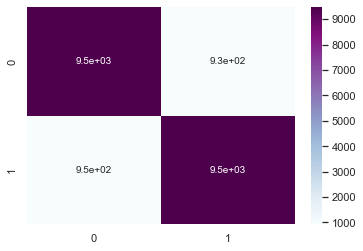

In [104]:
#Confusion matrix

cm=confusion_matrix(y_test,y_test_pred_xgb)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

Evaluation of the XGBoost model by cross-validation

Train set

In [105]:
print("5-fold cross-validation...")
scores = cross_val_score(xgb, X_train, y_train, scoring = 'f1', cv=5)
print('The cross-validated f1-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

5-fold cross-validation...
The cross-validated f1-score is :  0.9047727917347764
The standard deviation is :  0.01108858104318697


Whole dataset

In [106]:
print("5-fold cross-validation...")
scores = cross_val_score(xgb, X1, y, scoring = 'f1', cv=5)
print('The cross-validated f1-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

5-fold cross-validation...
The cross-validated f1-score is :  0.7795659756208018
The standard deviation is :  0.1277519526798468


Test set

In [107]:
print("5-fold cross-validation...")
scores = cross_val_score(xgb, X_test, y_test, scoring = 'f1', cv=5)
print('The cross-validated f1-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

5-fold cross-validation...
The cross-validated f1-score is :  0.8940799444782168
The standard deviation is :  0.012178558213887448


Conclusion XGBoost

Conclusion : The XG boost gives a slightly higher f1-score than the random-forest and higher than the logistic regression with f1-score = 0.91 approximately. But when evaluating the performance of the model there is a drop in the f1-score on the test and the whole dataset with f1-score = 0.89.

Final conclusion

So at the level of the choice of the model, for the prediction I will carry it on the random forest which presents a good f1-score = 0.90 and whose evaluation of the performance of the model remains correct with f1-score very close on the train/test and the whole dataset highlighted by the cross-valiation.